<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;">  Part-1

In [176]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

# Import data preparation libraries
from matplotlib.cbook import boxplot_stats  
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_digits
from sklearn.datasets import load_sample_images

# Import machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  1. Import and warehouse data:

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Import all the given datasets and explore shape and size of each

In [177]:
# Import all the parts of the data
data_car_name = pd.read_csv('Part1 - Car name.csv')
data_car_attr = pd.read_json('Part1 - Car-Attributes.json')

In [178]:
# Check size and shape of the data
print(data_car_name.size)
print(data_car_attr.size)
print(data_car_name.shape)
print(data_car_attr.shape)

398
3184
(398, 1)
(398, 8)


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Merge all datasets onto one and explore final shape and size

In [179]:
data = pd.concat([data_car_attr,data_car_name],1)
print(data.size)
print(data.shape)

3582
(398, 9)


In [180]:
data

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup
395  32.0    4  135.0   84  2295  11.6  82       1              dodge rampage
396  28.0    4  120.0   79  2625  18.6  82       1                ford ranger
397  31.0    4  119.0   82  2720  19.4  82       1                 chevy s-10

[398 rows x 9 columns]

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Export the final dataset

In [181]:
data.to_csv('data_car.csv')
data.to_excel('data_car.xlsx')
data.to_json('data_car.json')

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Import the final dataset

In [182]:
data = pd.read_csv('data_car.csv')

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  2. Data cleansing:

In [183]:
# Check the data types of the first part of data
data.dtypes

Unnamed: 0      int64
mpg           float64
cyl             int64
disp          float64
hp             object
wt              int64
acc           float64
yr              int64
origin          int64
car_name       object
dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Missing/incorrect value treatment

In [184]:
data.isna().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
wt            0
acc           0
yr            0
origin        0
car_name      0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Drop attributes

In [185]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data_attr = data.drop(['car_name'],axis=1)

In [186]:
data_attr

mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]

- The feature titled 'hp' is an object but the its data seems to be numeric. So, we need to convert this to a numeric data type.
- However, there seems to be some missing values labeled as '?'. So, first we find them and drop them.


In [187]:
data_attr = data_attr.replace('?',np.nan)
data_attr.isna().sum()

mpg       0
cyl       0
disp      0
hp        6
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [188]:
# Impute the null values using the most frequently occuring values in the respective column
columns = data_attr.columns
imputer = SimpleImputer(missing_values = np.nan, strategy ='most_frequent',copy=False)
df_temp = pd.DataFrame(data_attr['hp'])
data_imp = pd.DataFrame(imputer.fit_transform(df_temp))
data_attr['hp'] = data_imp
data_attr

mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]

In [189]:
data_attr['hp'] = pd.to_numeric(data_attr['hp'])
data_attr.dtypes

mpg       float64
cyl         int64
disp      float64
hp          int64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [190]:
data_attr_scaled = data_attr.apply(zscore)
data_attr_scaled

mpg       cyl      disp        hp        wt       acc        yr  \
0   -0.706439  1.498191  1.090604  0.644426  0.630870 -1.295498 -1.627426   
1   -1.090751  1.498191  1.503514  1.552280  0.854333 -1.477038 -1.627426   
2   -0.706439  1.498191  1.196232  1.163200  0.550470 -1.658577 -1.627426   
3   -0.962647  1.498191  1.061796  1.163200  0.546923 -1.295498 -1.627426   
4   -0.834543  1.498191  1.042591  0.903813  0.565841 -1.840117 -1.627426   
..        ...       ...       ...       ...       ...       ...       ...   
393  0.446497 -0.856321 -0.513026 -0.496876 -0.213324  0.011586  1.621983   
394  2.624265 -0.856321 -0.925936 -1.378791 -0.993671  3.279296  1.621983   
395  1.087017 -0.856321 -0.561039 -0.548753 -0.798585 -1.440730  1.621983   
396  0.574601 -0.856321 -0.705077 -0.678446 -0.408411  1.100822  1.621983   
397  0.958913 -0.856321 -0.714680 -0.600630 -0.296088  1.391285  1.621983   

       origin  
0   -0.715145  
1   -0.715145  
2   -0.715145  
3   -0.715145  
4   -0.715145  
..        ...  
393 -0.715145  
394  0.533222  
395 -0.715145  
396 -0.715145  
397 -0.715145  

[398 rows x 8 columns]

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  3. Data analysis & visualisation:

In [191]:
data.nunique()

mpg         129
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
origin        3
car_name    305
dtype: int64

In [192]:
data.describe()

mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

In [193]:
data.corr().style.background_gradient(cmap='BuGn')

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Univariate analysis

Text(0.5, 1.0, 'cyl')

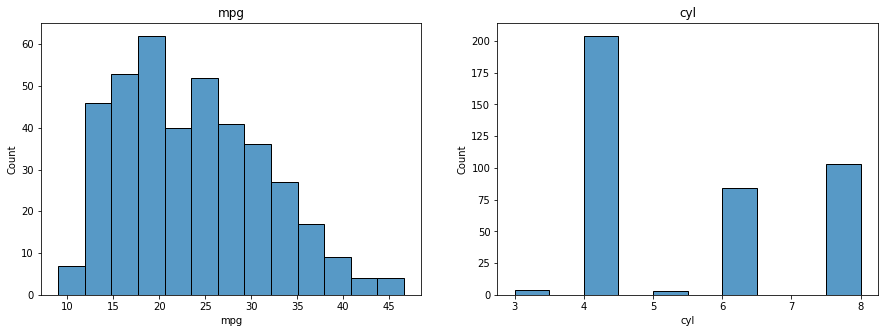

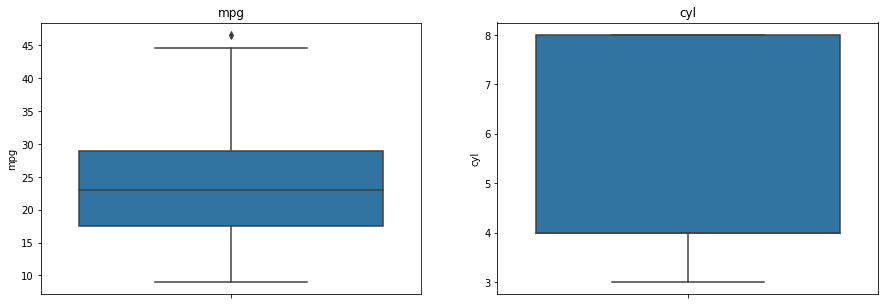

In [194]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['mpg'], ax = ax[0])
sns.histplot(data['cyl'], ax = ax[1])

ax[0].set_title('mpg')
ax[1].set_title('cyl')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "mpg",data=data, ax = ax[0])
sns.boxplot(y = "cyl",data=data, ax = ax[1])

ax[0].set_title('mpg')
ax[1].set_title('cyl')

Text(0.5, 1.0, 'wt')

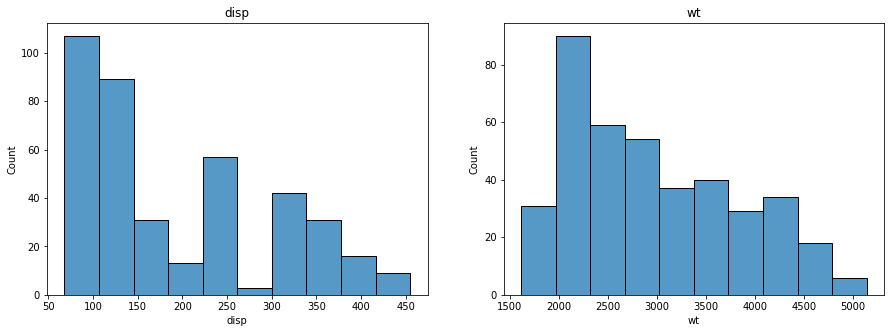

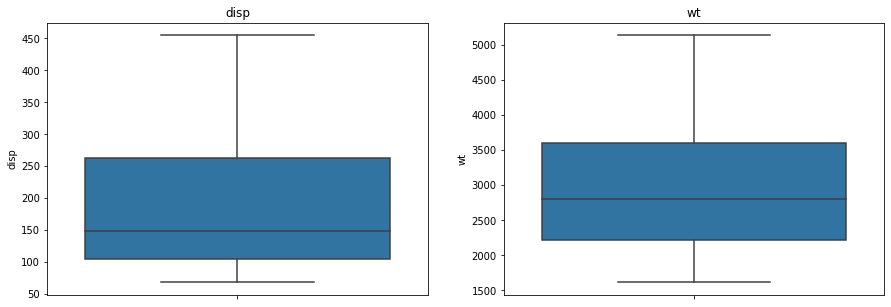

In [195]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['disp'], ax = ax[0])
sns.histplot(data['wt'], ax = ax[1])

ax[0].set_title('disp')
ax[1].set_title('wt')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "disp",data=data, ax = ax[0])
sns.boxplot(y = "wt",data=data, ax = ax[1])

ax[0].set_title('disp')
ax[1].set_title('wt')

Text(0.5, 1.0, 'yr')

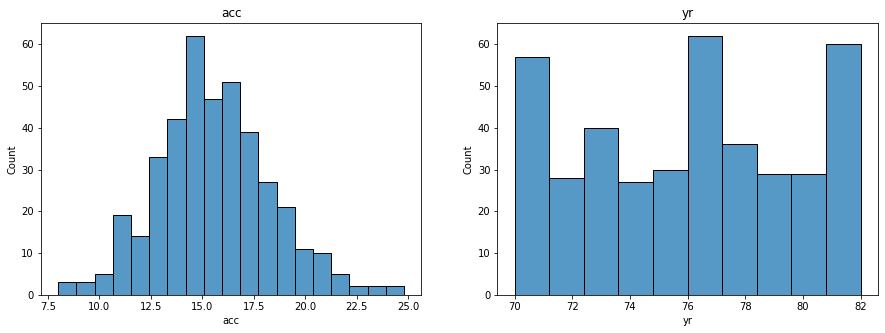

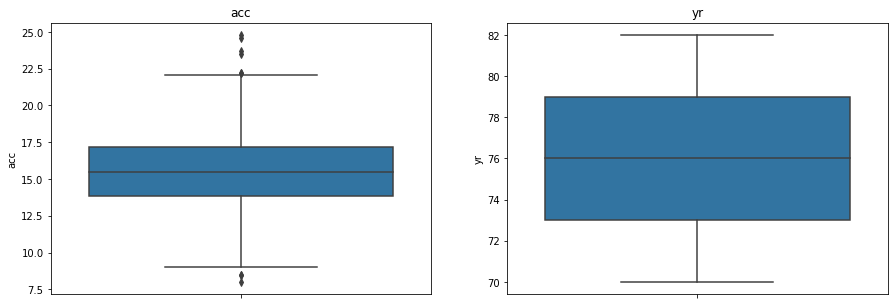

In [196]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['acc'], ax = ax[0])
sns.histplot(data['yr'], ax = ax[1])

ax[0].set_title('acc')
ax[1].set_title('yr')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "acc",data=data, ax = ax[0])
sns.boxplot(y = "yr",data=data, ax = ax[1])

ax[0].set_title('acc')
ax[1].set_title('yr')

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Multivariate analysis

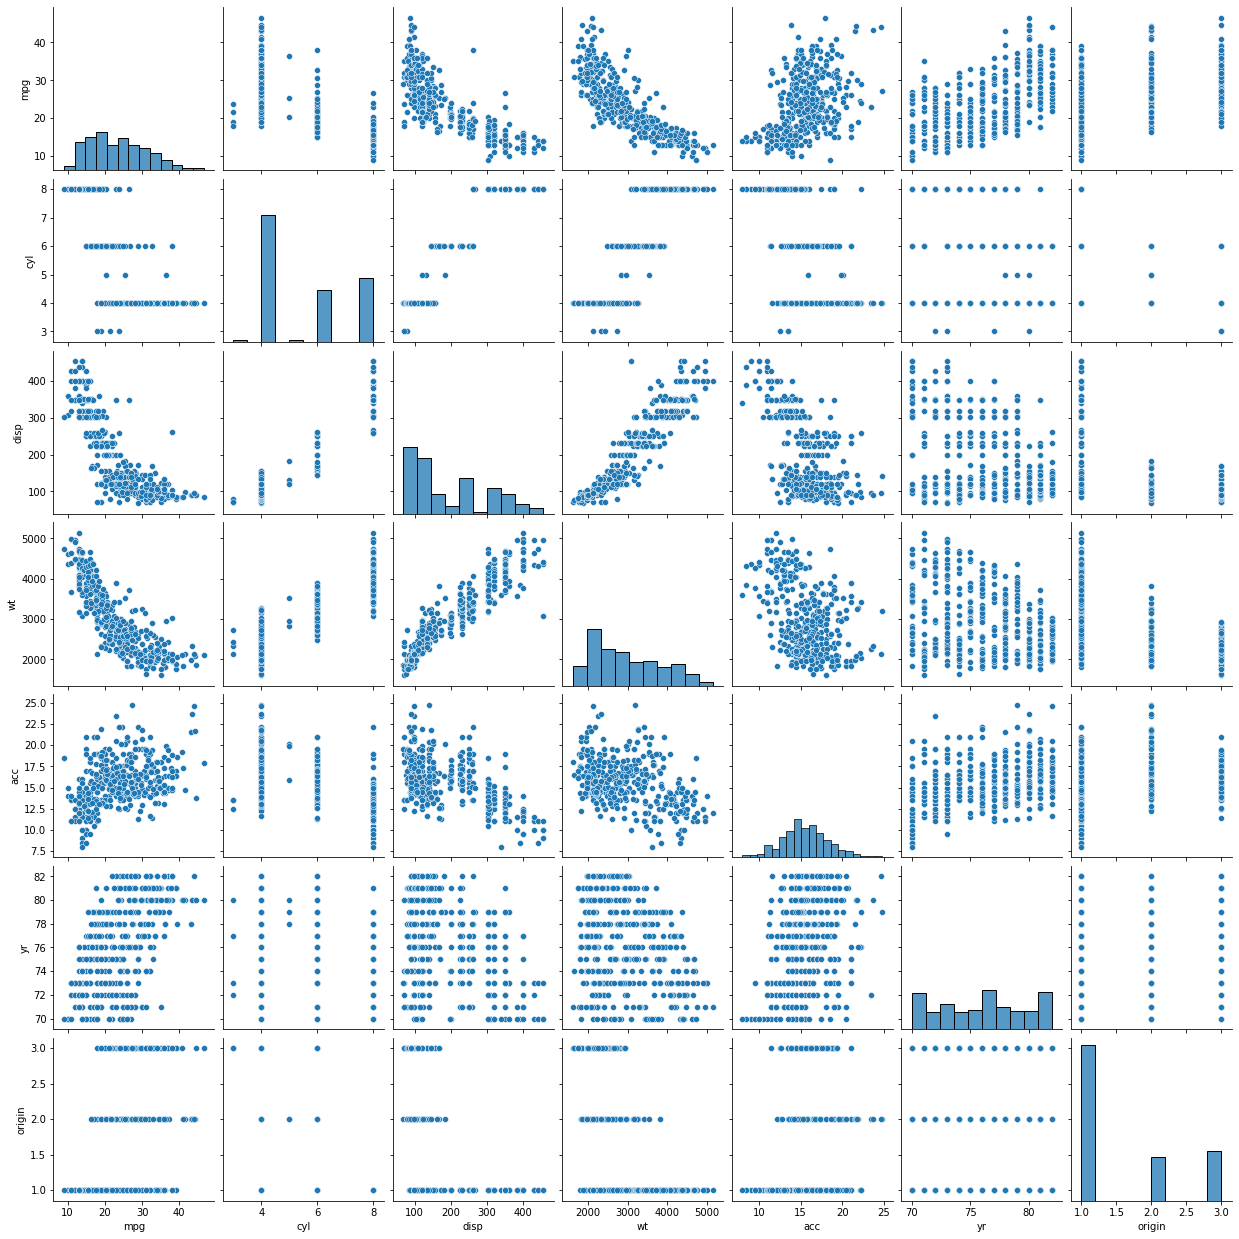

In [197]:
sns.pairplot(data)

- 'mpg' feature is negatively correlated to 'cyl', 'disp' and 'wt' features.
- 'mpg' feature is positively correlated to 'acc', 'yr' and 'origin' features.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  4. Machine learning

<span style="font-family: Arial; font-weight:bold;font-size:1,5em;color:#00b3e5;">  K-Means clustering

Text(0.5, 1.0, 'No. clusters vs. mean of the distances b/w the data points and their closest cluster')

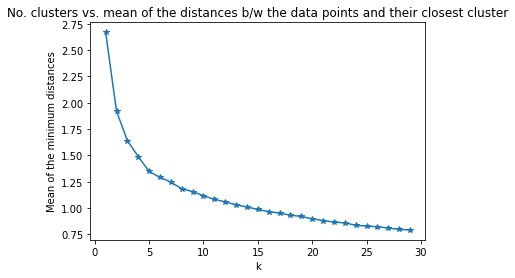

In [198]:
no_clusters = range(1,30)
mean_min_distances = []

for k in no_clusters:
    k_means_model = KMeans(n_clusters=k,n_init=5,random_state=1)
    k_means_model.fit(data_attr_scaled)
    prediction = k_means_model.predict(data_attr_scaled)
    distances = cdist(data_attr_scaled,k_means_model.cluster_centers_)
    distances_closest_cluster = np.min(distances,axis=1)
    mean_min_distances.append(sum(distances_closest_cluster)/max(data_attr.shape))
    
plt.plot(no_clusters,mean_min_distances,'*-')
plt.xlabel('k')
plt.ylabel('Mean of the minimum distances')
plt.title('No. clusters vs. mean of the distances b/w the data points and their closest cluster')

- From elbow method, we can select k = 4, as the mean of the ,inimum distances is stabilized after this.

<span style="font-family: Arial; font-weight:bold;font-size:1,5em;color:#00b3e5;">  Agglomerative clustering

In [199]:
Z = linkage(data_attr_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z, pdist(data_attr_scaled))
c

0.6963811174183852

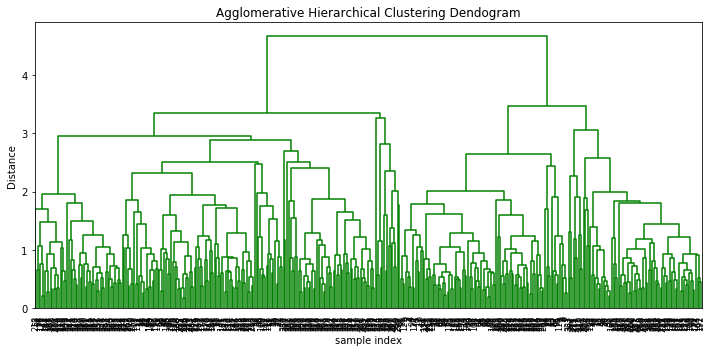

In [200]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [201]:
Z = linkage(data_attr_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z, pdist(data_attr_scaled))
c

0.6774135270211021

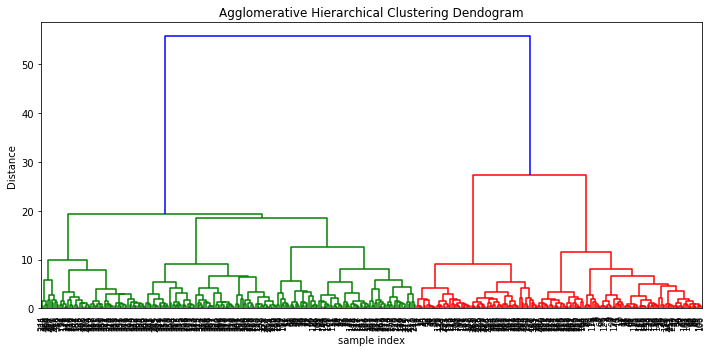

In [202]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [203]:
Z = linkage(data_attr_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z, pdist(data_attr_scaled))
c

0.7297518571846641

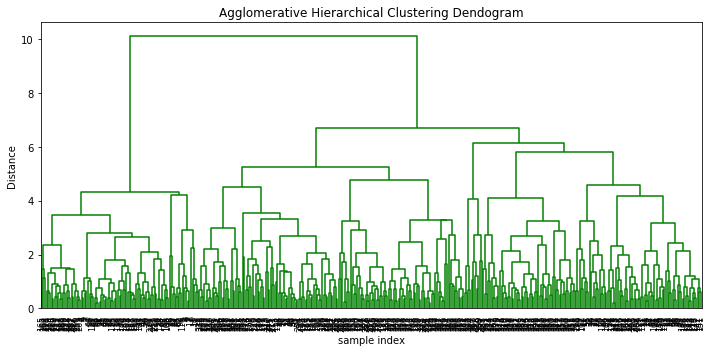

In [204]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

- We obtain a better c-value by using 'complete' method.
- Here, we select k = 3, as it seems appropriate from the above dendogram.

Differences in two methods:
- using k-means clustering, the cluster centers come closer as the k value increases. So, we choose the optimal number of clusters by looking at the how much the clusters are close to each other.
- using agglomerative clustering, we can choose the number of clusters by dissecting the dendogram at certain level where the difference between the distance measure is minimum.  

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  5. Outcomes using ML based methods

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> Choosing optimal number of clusters

- In the case of k-means clustering, we chose k = 4 because in the elbow method, the distance between the centers of the clusters is not effected much after this.
- In the case of agglomwerative clustering, we chose k = 3 by dissecting the dendogram. 

In [205]:
k_means_model_4 = KMeans(n_clusters=4,n_init=3,random_state=1)
k_means_model_4.fit(data_attr_scaled)
prediction = k_means_model_4.predict(data_attr_scaled)

data_k_means_clust_4 = data.copy(deep=True)
data_attr_k_means_clust_4 = data_attr.copy(deep=True)
data_attr_scaled_k_means_clust_4 = data_attr_scaled.copy(deep=True)

data_k_means_clust_4['kmeans_cluster_index'] = prediction
data_attr_k_means_clust_4['kmeans_cluster_index'] = prediction
data_attr_scaled_k_means_clust_4['kmeans_cluster_index'] = prediction
data_k_means_clust_4

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name  \
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu   
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320   
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite   
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst   
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino   
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...   
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl   
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup   
395  32.0    4  135.0   84  2295  11.6  82       1              dodge rampage   
396  28.0    4  120.0   79  2625  18.6  82       1                ford ranger   
397  31.0    4  119.0   82  2720  19.4  82       1                 chevy s-10   

     kmeans_cluster_index  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
..                    ...  
393                     3  
394                     1  
395                     3  
396                     3  
397                     3  

[398 rows x 10 columns]

In [206]:
data_attr_grpby_k_means_clust_4 = data_k_means_clust_4.groupby(['kmeans_cluster_index'])
data_attr_grpby_k_means_clust_4.count()

mpg  cyl  disp   hp   wt  acc   yr  origin  car_name
kmeans_cluster_index                                                      
0                      95   95    95   95   95   95   95      95        95
1                     130  130   130  130  130  130  130     130       130
2                      81   81    81   81   81   81   81      81        81
3                      92   92    92   92   92   92   92      92        92

In [207]:
agg_clust_model_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
agg_clust_model_3.fit(data_attr_scaled)

data_agg_clust_3 = data.copy(deep=True)
data_attr_agg_clust_3 = data_attr.copy(deep=True)
data_attr_scaled_agg_clust_3 = data_attr_scaled.copy(deep=True)

data_agg_clust_3['agg_cluster_index'] = agg_clust_model_3.labels_
data_attr_agg_clust_3['agg_cluster_index'] = agg_clust_model_3.labels_
data_attr_scaled_agg_clust_3['agg_cluster_index'] = agg_clust_model_3.labels_
data_agg_clust_3

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name  \
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu   
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320   
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite   
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst   
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino   
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...   
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl   
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup   
395  32.0    4  135.0   84  2295  11.6  82       1              dodge rampage   
396  28.0    4  120.0   79  2625  18.6  82       1                ford ranger   
397  31.0    4  119.0   82  2720  19.4  82       1                 chevy s-10   

     agg_cluster_index  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2  
..                 ...  
393                  0  
394                  0  
395                  0  
396                  0  
397                  0  

[398 rows x 10 columns]

In [208]:
data_attr_grpby_agg_clust_3 = data_agg_clust_3.groupby(['agg_cluster_index'])
data_attr_grpby_agg_clust_3.count()

mpg  cyl  disp   hp   wt  acc   yr  origin  car_name
agg_cluster_index                                                      
0                  218  218   218  218  218  218  218     218       218
1                   80   80    80   80   80   80   80      80        80
2                  100  100   100  100  100  100  100     100       100

In [209]:
aagg_clust_model_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
agg_clust_model_3.fit(data_attr_scaled)

data_agg_clust_3 = data.copy(deep=True)
data_attr_agg_clust_3 = data_attr.copy(deep=True)
data_attr_scaled_agg_clust_3 = data_attr_scaled.copy(deep=True)

data_agg_clust_3['agg_cluster_index'] = agg_clust_model_3.labels_
data_attr_agg_clust_3['agg_cluster_index'] = agg_clust_model_3.labels_
data_attr_scaled_agg_clust_3['agg_cluster_index'] = agg_clust_model_3.labels_
data_agg_clust_3

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name  \
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu   
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320   
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite   
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst   
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino   
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...   
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl   
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup   
395  32.0    4  135.0   84  2295  11.6  82       1              dodge rampage   
396  28.0    4  120.0   79  2625  18.6  82       1                ford ranger   
397  31.0    4  119.0   82  2720  19.4  82       1                 chevy s-10   

     agg_cluster_index  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2  
..                 ...  
393                  0  
394                  0  
395                  0  
396                  0  
397                  0  

[398 rows x 10 columns]

In [210]:
data_attr_grpby_agg_clust_3 = data_agg_clust_3.groupby(['agg_cluster_index'])
data_attr_grpby_agg_clust_3.count()

mpg  cyl  disp   hp   wt  acc   yr  origin  car_name
agg_cluster_index                                                      
0                  218  218   218  218  218  218  218     218       218
1                   80   80    80   80   80   80   80      80        80
2                  100  100   100  100  100  100  100     100       100

In [211]:
agg_clust_model_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
agg_clust_model_3.fit(data_attr_scaled)

data_agg_clust_3 = data.copy(deep=True)
data_attr_agg_clust_3 = data_attr.copy(deep=True)
data_attr_scaled_agg_clust_3 = data_attr_scaled.copy(deep=True)

data_agg_clust_3['agg_cluster_index'] = agg_clust_model_3.labels_
data_attr_agg_clust_3['agg_cluster_index'] = agg_clust_model_3.labels_
data_attr_scaled_agg_clust_3['agg_cluster_index'] = agg_clust_model_3.labels_
data_agg_clust_3

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name  \
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu   
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320   
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite   
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst   
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino   
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...   
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl   
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup   
395  32.0    4  135.0   84  2295  11.6  82       1              dodge rampage   
396  28.0    4  120.0   79  2625  18.6  82       1                ford ranger   
397  31.0    4  119.0   82  2720  19.4  82       1                 chevy s-10   

     agg_cluster_index  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
..                 ...  
393                  2  
394                  0  
395                  2  
396                  2  
397                  2  

[398 rows x 10 columns]

In [212]:
data_attr_grpby_agg_clust_3 = data_agg_clust_3.groupby(['agg_cluster_index'])
data_attr_grpby_agg_clust_3.count()

mpg  cyl  disp   hp   wt  acc   yr  origin  car_name
agg_cluster_index                                                      
0                  143  143   143  143  143  143  143     143       143
1                   95   95    95   95   95   95   95      95        95
2                  160  160   160  160  160  160  160     160       160

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> Linear regression - whole data

In [213]:
X = data_attr_scaled.drop(['mpg'], axis=1)
y = data_attr_scaled[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regression_model_whole_data = LinearRegression()
regression_model_whole_data.fit(X_train, y_train)
print('In-sample score: ',regression_model_whole_data.score(X_train, y_train))
print('Out-of-sample score: ',regression_model_whole_data.score(X_test, y_test))

In-sample score:  0.8079710146036575
Out-of-sample score:  0.846647231566727


In [214]:
regression_model_whole_data.coef_

array([[-0.08686157,  0.29776643, -0.07041137, -0.77807566,  0.03071345,
         0.37706099,  0.1186854 ]])

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> Linear regression - K-Means clustering - cluster - 0

In [215]:
X = data_attr_scaled_k_means_clust_4[data_attr_scaled_k_means_clust_4['kmeans_cluster_index']==0].drop(['mpg','kmeans_cluster_index'], axis=1)
y = data_attr_scaled_k_means_clust_4['mpg'][data_attr_scaled_k_means_clust_4['kmeans_cluster_index']==0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model_k_means_0 = LinearRegression()
regression_model_k_means_0.fit(X_train, y_train)
print('In-sample score: ',regression_model_k_means_0.score(X_train, y_train))
print('Out-of-sample score: ',regression_model_k_means_0.score(X_test, y_test))

In-sample score:  0.6226932769752426
Out-of-sample score:  0.3906462524522817


In [216]:
regression_model_k_means_0.coef_

array([ 0.18086306,  0.02758432, -0.15974089, -0.16674111, -0.15287739,
        0.16417549, -0.04521576])

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> Linear regression - K-Means clustering - cluster - 1

In [217]:
X = data_attr_scaled_k_means_clust_4[data_attr_scaled_k_means_clust_4['kmeans_cluster_index']==1].drop(['mpg','kmeans_cluster_index'], axis=1)
y = data_attr_scaled_k_means_clust_4['mpg'][data_attr_scaled_k_means_clust_4['kmeans_cluster_index']==1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model_k_means_1 = LinearRegression()
regression_model_k_means_1.fit(X_train, y_train)
print('In-sample score: ',regression_model_k_means_1.score(X_train, y_train))
print('Out-of-sample score: ',regression_model_k_means_1.score(X_test, y_test))

In-sample score:  0.6862397177020041
Out-of-sample score:  0.5856338649499511


In [218]:
regression_model_k_means_1.coef_

array([ 0.10836728,  0.58210577,  0.19224781, -1.19143346,  0.27866158,
        0.51745407, -0.0787137 ])

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> Linear regression - K-Means clustering - cluster - 2

In [219]:
X = data_attr_scaled_k_means_clust_4[data_attr_scaled_k_means_clust_4['kmeans_cluster_index']==2].drop(['mpg','kmeans_cluster_index'], axis=1)
y = data_attr_scaled_k_means_clust_4['mpg'][data_attr_scaled_k_means_clust_4['kmeans_cluster_index']==2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regression_model_k_means_2 = LinearRegression()
regression_model_k_means_2.fit(X_train, y_train)
print('In-sample score: ',regression_model_k_means_2.score(X_train, y_train))
print('Out-of-sample score: ',regression_model_k_means_2.score(X_test, y_test))

In-sample score:  0.3392144408458869
Out-of-sample score:  0.4880053746877453


In [220]:
regression_model_k_means_2.coef_

array([ 0.19765898,  0.03939206,  0.02940626, -0.43009948,  0.00671   ,
        0.14140164, -0.08763175])

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> Linear regression - K-Means clustering - cluster - 3

In [221]:
X = data_attr_scaled_k_means_clust_4[data_attr_scaled_k_means_clust_4['kmeans_cluster_index']==3].drop(['mpg','kmeans_cluster_index'], axis=1)
y = data_attr_scaled_k_means_clust_4['mpg'][data_attr_scaled_k_means_clust_4['kmeans_cluster_index']==3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

regression_model_k_means_3 = LinearRegression()
regression_model_k_means_3.fit(X_train, y_train)
print('In-sample score: ',regression_model_k_means_3.score(X_train, y_train))
print('Out-of-sample score: ',regression_model_k_means_3.score(X_test, y_test))

In-sample score:  0.7303232658720861
Out-of-sample score:  0.5294281957353814


In [222]:
regression_model_k_means_3.coef_

array([ 0.30906601, -0.31324594, -0.28345045, -1.00536854, -0.05299234,
        0.40998959,  0.46552794])

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> Linear regression - Agglomerative clustering - cluster - 0

In [223]:
X = data_attr_scaled_agg_clust_3[data_attr_scaled_agg_clust_3['agg_cluster_index']==0].drop(['mpg','agg_cluster_index'], axis=1)
y = data_attr_scaled_agg_clust_3['mpg'][data_attr_scaled_agg_clust_3['agg_cluster_index']==0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regression_model_agg_0 = LinearRegression()
regression_model_agg_0.fit(X_train, y_train)
print('In-sample score: ',regression_model_agg_0.score(X_train, y_train))
print('Out-of-sample score: ',regression_model_agg_0.score(X_test, y_test))

In-sample score:  0.6773115087345022
Out-of-sample score:  0.67304512753263


In [224]:
regression_model_agg_0.coef_

array([ 0.39790398, -0.1601072 , -0.02951674, -0.86783641,  0.11824393,
        0.50264855, -0.02051247])

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> Linear regression - Agglomerative clustering - cluster - 1

In [225]:
X = data_attr_scaled_agg_clust_3[data_attr_scaled_agg_clust_3['agg_cluster_index']==1].drop(['mpg','agg_cluster_index'], axis=1)
y = data_attr_scaled_agg_clust_3['mpg'][data_attr_scaled_agg_clust_3['agg_cluster_index']==1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regression_model_agg_1 = LinearRegression()
regression_model_agg_1.fit(X_train, y_train)
print('In-sample score: ',regression_model_agg_1.score(X_train, y_train))
print('Out-of-sample score: ',regression_model_agg_1.score(X_test, y_test))

In-sample score:  0.5634457678012479
Out-of-sample score:  0.5543517541334066


In [226]:
regression_model_agg_1.coef_

array([ 0.03356856, -0.03261341, -0.12448242, -0.12291215, -0.16407405,
        0.15781269, -0.00839214])

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> Linear regression - Agglomerative clustering - cluster - 2

In [227]:
X = data_attr_scaled_agg_clust_3[data_attr_scaled_agg_clust_3['agg_cluster_index']==2].drop(['mpg','agg_cluster_index'], axis=1)
y = data_attr_scaled_agg_clust_3['mpg'][data_attr_scaled_agg_clust_3['agg_cluster_index']==2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regression_model_agg_2 = LinearRegression()
regression_model_agg_2.fit(X_train, y_train)
print('In-sample score: ',regression_model_agg_2.score(X_train, y_train))
print('Out-of-sample score: ',regression_model_agg_2.score(X_test, y_test))

In-sample score:  0.7436009125442163
Out-of-sample score:  0.9008699591150124


In [228]:
regression_model_agg_2.coef_

array([-0.01316714, -0.00457737, -0.14090173, -0.69028109, -0.04111163,
        0.31515369, -0.12708879])

Observations:
- it is observed that the model built using one cluster gives more accurate predictions than the models that were built on different clusters,
- the reason could be the loss of variance in the data in the clusters. Also, the clustering induced bias into the data.

Improvisation:
- as it can observed, the amount of data both in terms of observations and features is very less.
- one can improve the dataset by collecting the information related to the testing or real-life road tracks in which the given data is measured.
- also the environmental conditions along with the whithering state of the tested cars also effect the data studying here.

<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;">  Part-2

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  1. Import and warehouse data:

In [229]:
data = pd.read_excel('Part2 - Company.xlsx')

In [230]:
data.dtypes

A           int64
B           int64
C           int64
D           int64
Quality    object
dtype: object

In [231]:
data

A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
2   159  163  135  131        NaN
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
..  ...  ...  ...  ...        ...
56  200  186  185  179  Quality B
57  137  182  165  199        NaN
58   88   39    9  102        NaN
59  180  157  192  198        NaN
60  157  135  135  156        NaN

[61 rows x 5 columns]

In [232]:
data.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [233]:
data['Quality'].unique()

array(['Quality A', 'Quality B', nan], dtype=object)

There are two types of qualities and some missing classes.

In [234]:
data_attr = data.drop('Quality',axis=1)
data_attr.shape

(61, 4)

In [235]:
data_attr_scaled = data_attr.apply(zscore)
data_attr_scaled

A         B         C         D
0  -1.168034 -1.561080 -1.061569 -0.103138
1   0.904992  0.284923  0.306077  0.823013
2   0.660147  0.807376  0.321443  0.264129
3  -0.939512 -1.630740 -1.706975 -1.125099
4  -0.972158 -0.986381 -1.614775 -0.741864
..       ...       ...       ...       ...
56  1.329392  1.207924  1.089784  1.030599
57  0.301040  1.138264  0.782448  1.349962
58 -0.498789 -1.352098 -1.614775 -0.198947
59  1.002931  0.702886  1.197352  1.333994
60  0.627501  0.319753  0.321443  0.663332

[61 rows x 4 columns]

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  2. Machine learning model:

In [236]:
final_k_means_model = KMeans(n_clusters=2)
final_k_means_model.fit(data_attr_scaled)
prediction = final_k_means_model.predict(data_attr_scaled)
    
data['kmeans_cluster_index'] = prediction
data_attr['kmeans_cluster_index'] = prediction
data_attr_scaled['kmeans_cluster_index'] = prediction
data

A    B    C    D    Quality  kmeans_cluster_index
0    47   27   45  108  Quality A                     1
1   174  133  134  166  Quality B                     0
2   159  163  135  131        NaN                     0
3    61   23    3   44  Quality A                     1
4    59   60    9   68  Quality A                     1
..  ...  ...  ...  ...        ...                   ...
56  200  186  185  179  Quality B                     0
57  137  182  165  199        NaN                     0
58   88   39    9  102        NaN                     1
59  180  157  192  198        NaN                     0
60  157  135  135  156        NaN                     0

[61 rows x 6 columns]

In [237]:
data_attr

A    B    C    D  kmeans_cluster_index
0    47   27   45  108                     1
1   174  133  134  166                     0
2   159  163  135  131                     0
3    61   23    3   44                     1
4    59   60    9   68                     1
..  ...  ...  ...  ...                   ...
56  200  186  185  179                     0
57  137  182  165  199                     0
58   88   39    9  102                     1
59  180  157  192  198                     0
60  157  135  135  156                     0

[61 rows x 5 columns]

In [238]:
data.groupby(['kmeans_cluster_index'])[['Quality','kmeans_cluster_index']].apply(print)

      Quality  kmeans_cluster_index
1   Quality B                     0
2         NaN                     0
5         NaN                     0
7         NaN                     0
8   Quality B                     0
9         NaN                     0
11  Quality B                     0
14        NaN                     0
15  Quality B                     0
18        NaN                     0
19  Quality B                     0
20  Quality B                     0
23        NaN                     0
26  Quality B                     0
27        NaN                     0
30  Quality B                     0
31  Quality B                     0
32        NaN                     0
33  Quality B                     0
34  Quality B                     0
35        NaN                     0
36  Quality B                     0
37  Quality B                     0
40        NaN                     0
43  Quality B                     0
46        NaN                     0
48  Quality B               

Empty DataFrame
Columns: []
Index: []

In [239]:
data.loc[(data['Quality'].isnull()) & (data['kmeans_cluster_index']==0),'Quality'] = 'Quality A'
data.loc[(data['Quality'].isnull()) & (data['kmeans_cluster_index']==1),'Quality'] = 'Quality B'

In [240]:
data

A    B    C    D    Quality  kmeans_cluster_index
0    47   27   45  108  Quality A                     1
1   174  133  134  166  Quality B                     0
2   159  163  135  131  Quality A                     0
3    61   23    3   44  Quality A                     1
4    59   60    9   68  Quality A                     1
..  ...  ...  ...  ...        ...                   ...
56  200  186  185  179  Quality B                     0
57  137  182  165  199  Quality A                     0
58   88   39    9  102  Quality B                     1
59  180  157  192  198  Quality A                     0
60  157  135  135  156  Quality A                     0

[61 rows x 6 columns]

In [241]:
data.isnull().sum()

A                       0
B                       0
C                       0
D                       0
Quality                 0
kmeans_cluster_index    0
dtype: int64

One can observe from the above result that the missing values are succesfully imputed by using the k-means based clustering model.

<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;">  Part-3

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  1. Data

In [242]:
data = pd.read_csv('Part3 - vehicle.csv')

In [243]:
data.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                   NaN                       10          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        1

In [244]:
print(data.size)
print(data.shape)

16074
(846, 19)


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  2. EDA and visualisation

In [245]:
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [246]:
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [247]:
data.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [248]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  2. Univariate analysis

Text(0.5, 1.0, 'circularity')

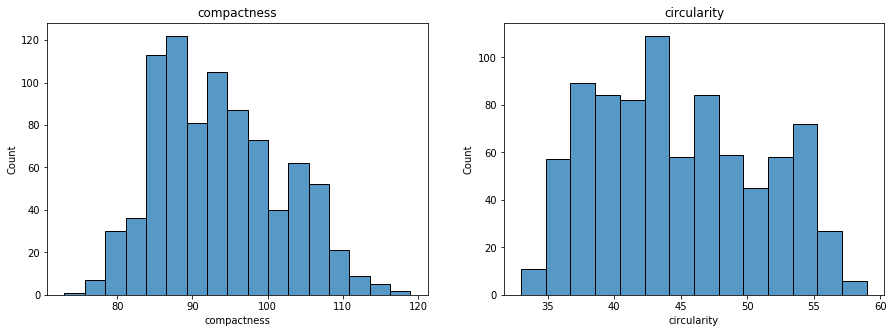

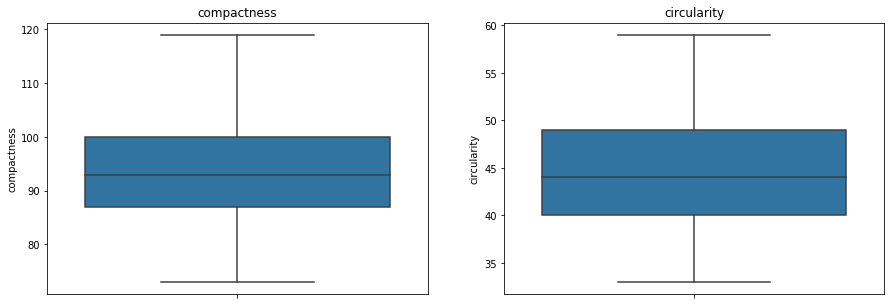

In [249]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['compactness'], ax = ax[0])
sns.histplot(data['circularity'], ax = ax[1])

ax[0].set_title('compactness')
ax[1].set_title('circularity')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "compactness",data=data, ax = ax[0])
sns.boxplot(y = "circularity",data=data, ax = ax[1])

ax[0].set_title('compactness')
ax[1].set_title('circularity')

Text(0.5, 1.0, 'radius_ratio')

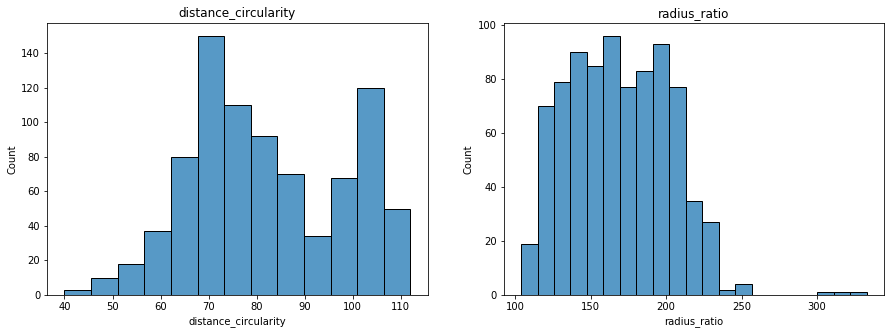

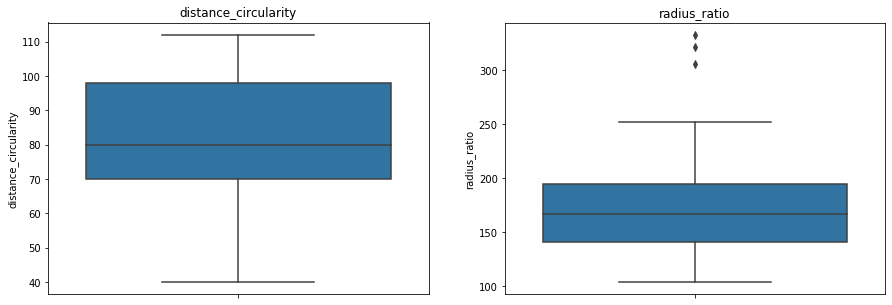

In [250]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['distance_circularity'], ax = ax[0])
sns.histplot(data['radius_ratio'], ax = ax[1])

ax[0].set_title('distance_circularity')
ax[1].set_title('radius_ratio')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "distance_circularity",data=data, ax = ax[0])
sns.boxplot(y = "radius_ratio",data=data, ax = ax[1])

ax[0].set_title('distance_circularity')
ax[1].set_title('radius_ratio')

Text(0.5, 1.0, 'max.length_aspect_ratio')

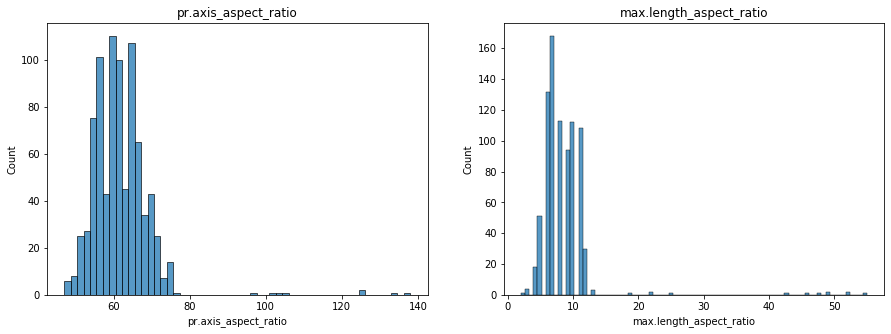

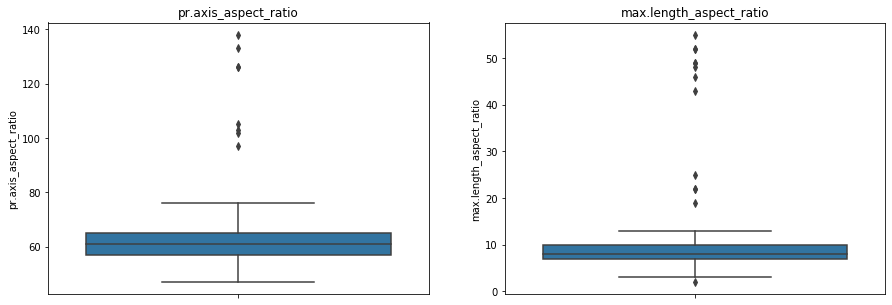

In [251]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['pr.axis_aspect_ratio'], ax = ax[0])
sns.histplot(data['max.length_aspect_ratio'], ax = ax[1])

ax[0].set_title('pr.axis_aspect_ratio')
ax[1].set_title('max.length_aspect_ratio')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "pr.axis_aspect_ratio",data=data, ax = ax[0])
sns.boxplot(y = "max.length_aspect_ratio",data=data, ax = ax[1])

ax[0].set_title('pr.axis_aspect_ratio')
ax[1].set_title('max.length_aspect_ratio')

Text(0.5, 1.0, 'elongatedness')

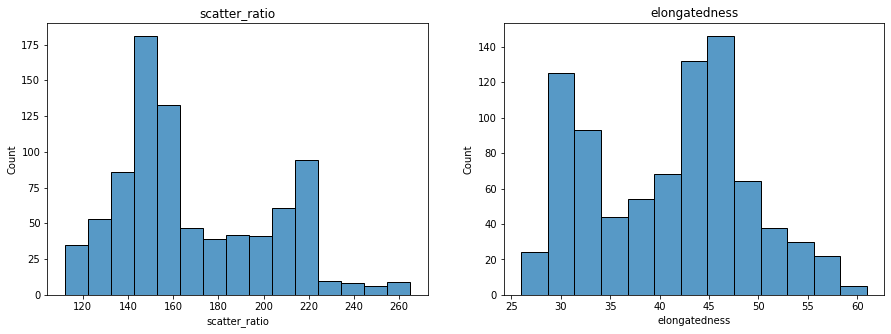

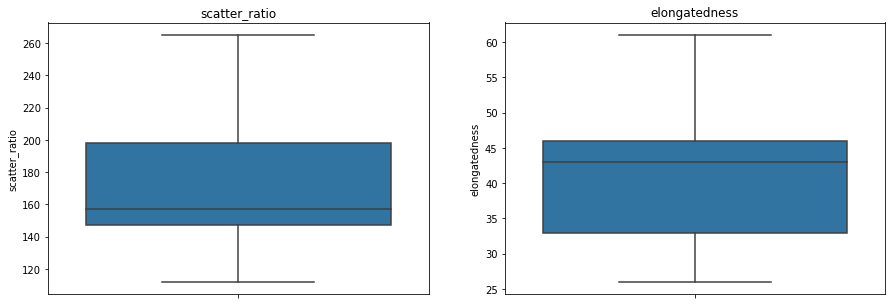

In [252]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['scatter_ratio'], ax = ax[0])
sns.histplot(data['elongatedness'], ax = ax[1])

ax[0].set_title('scatter_ratio')
ax[1].set_title('elongatedness')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "scatter_ratio",data=data, ax = ax[0])
sns.boxplot(y = "elongatedness",data=data, ax = ax[1])

ax[0].set_title('scatter_ratio')
ax[1].set_title('elongatedness')

Text(0.5, 1.0, 'max.length_rectangularity')

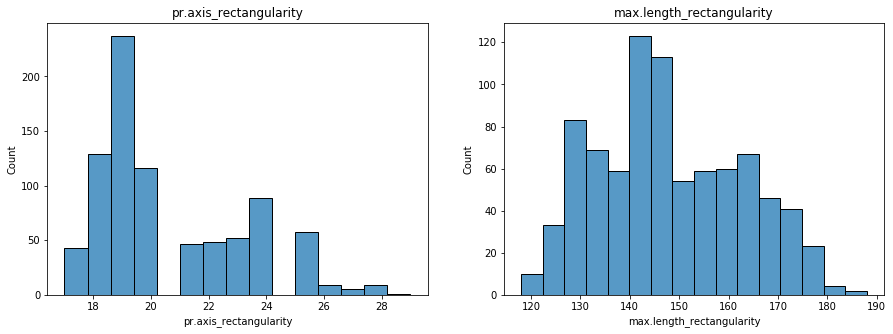

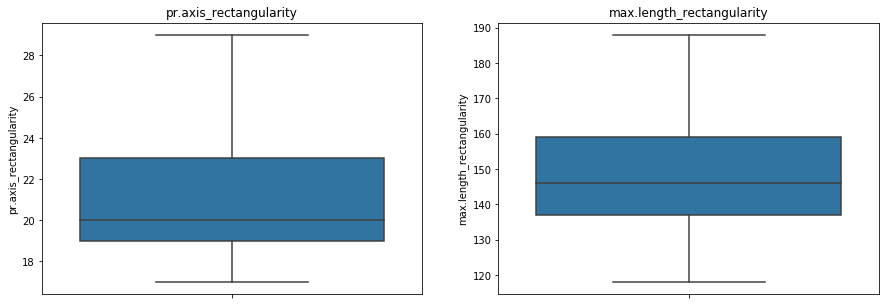

In [253]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['pr.axis_rectangularity'], ax = ax[0])
sns.histplot(data['max.length_rectangularity'], ax = ax[1])

ax[0].set_title('pr.axis_rectangularity')
ax[1].set_title('max.length_rectangularity')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "pr.axis_rectangularity",data=data, ax = ax[0])
sns.boxplot(y = "max.length_rectangularity",data=data, ax = ax[1])

ax[0].set_title('pr.axis_rectangularity')
ax[1].set_title('max.length_rectangularity')

Text(0.5, 1.0, 'scaled_variance.1')

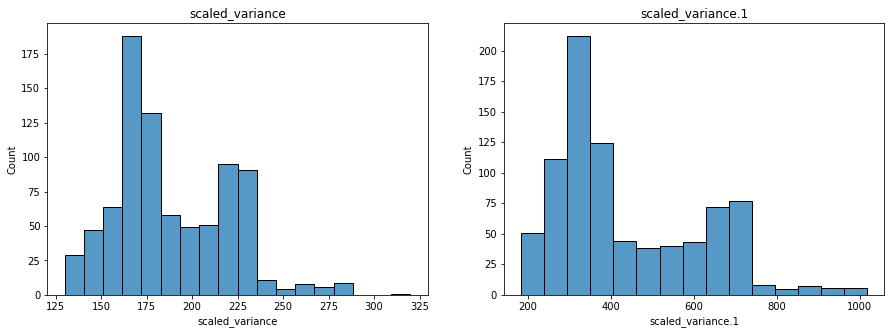

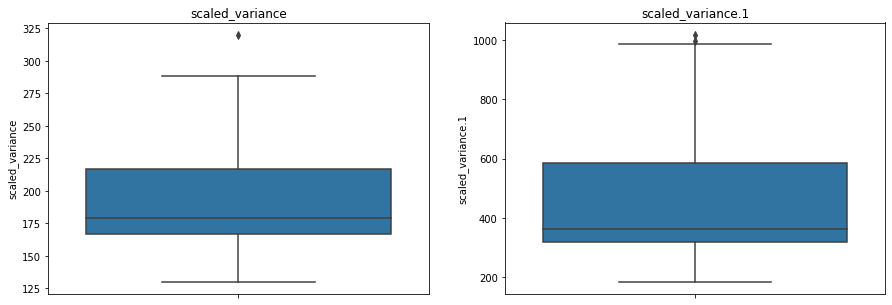

In [254]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['scaled_variance'], ax = ax[0])
sns.histplot(data['scaled_variance.1'], ax = ax[1])

ax[0].set_title('scaled_variance')
ax[1].set_title('scaled_variance.1')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "scaled_variance",data=data, ax = ax[0])
sns.boxplot(y = "scaled_variance.1",data=data, ax = ax[1])

ax[0].set_title('scaled_variance')
ax[1].set_title('scaled_variance.1')

Text(0.5, 1.0, 'scaled_radius_of_gyration.1')

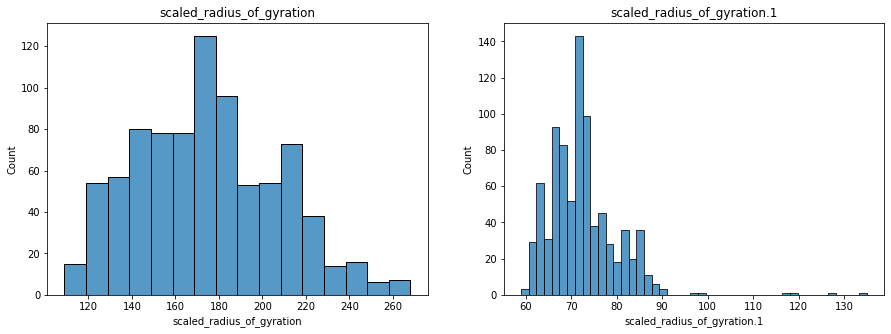

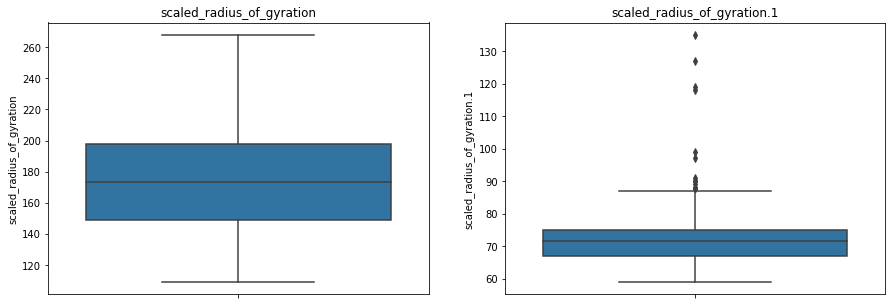

In [255]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['scaled_radius_of_gyration'], ax = ax[0])
sns.histplot(data['scaled_radius_of_gyration.1'], ax = ax[1])

ax[0].set_title('scaled_radius_of_gyration')
ax[1].set_title('scaled_radius_of_gyration.1')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "scaled_radius_of_gyration",data=data, ax = ax[0])
sns.boxplot(y = "scaled_radius_of_gyration.1",data=data, ax = ax[1])

ax[0].set_title('scaled_radius_of_gyration')
ax[1].set_title('scaled_radius_of_gyration.1')

Text(0.5, 1.0, 'skewness_about.1')

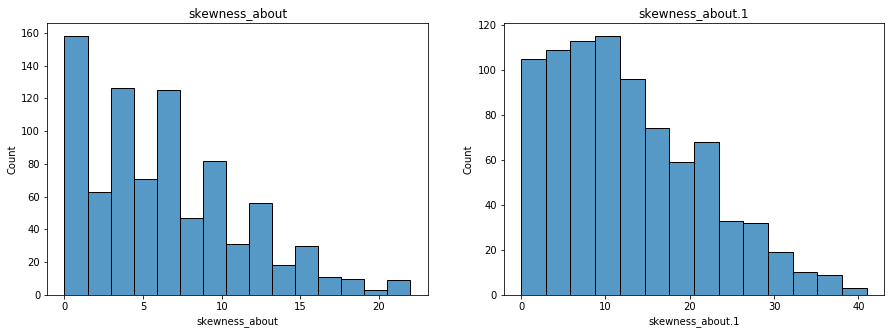

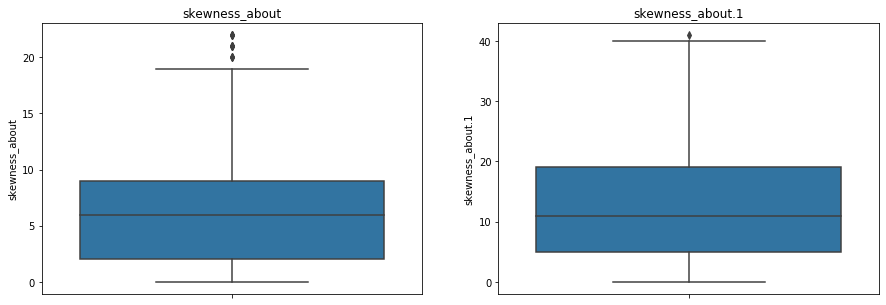

In [256]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['skewness_about'], ax = ax[0])
sns.histplot(data['skewness_about.1'], ax = ax[1])

ax[0].set_title('skewness_about')
ax[1].set_title('skewness_about.1')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "skewness_about",data=data, ax = ax[0])
sns.boxplot(y = "skewness_about.1",data=data, ax = ax[1])

ax[0].set_title('skewness_about')
ax[1].set_title('skewness_about.1')

Text(0.5, 1.0, 'skewness_about.2')

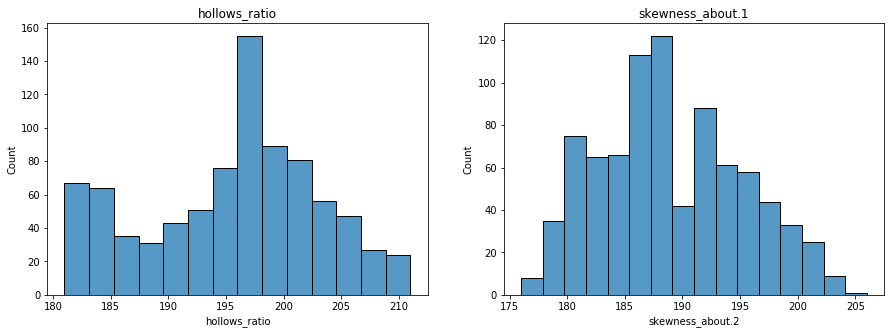

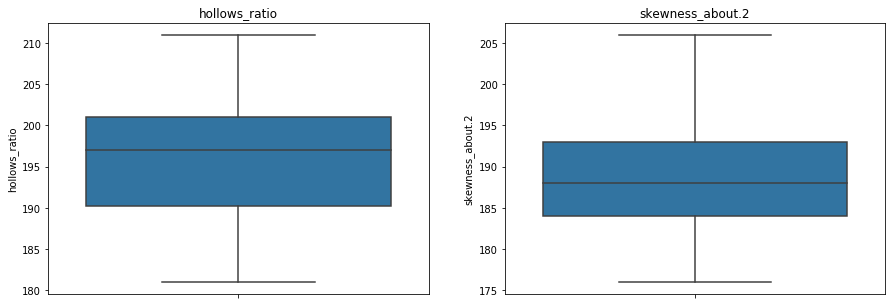

In [257]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['hollows_ratio'], ax = ax[0])
sns.histplot(data['skewness_about.2'], ax = ax[1])

ax[0].set_title('hollows_ratio')
ax[1].set_title('skewness_about.1')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "hollows_ratio",data=data, ax = ax[0])
sns.boxplot(y = "skewness_about.2",data=data, ax = ax[1])

ax[0].set_title('hollows_ratio')
ax[1].set_title('skewness_about.2')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  2. Multivariate analysis

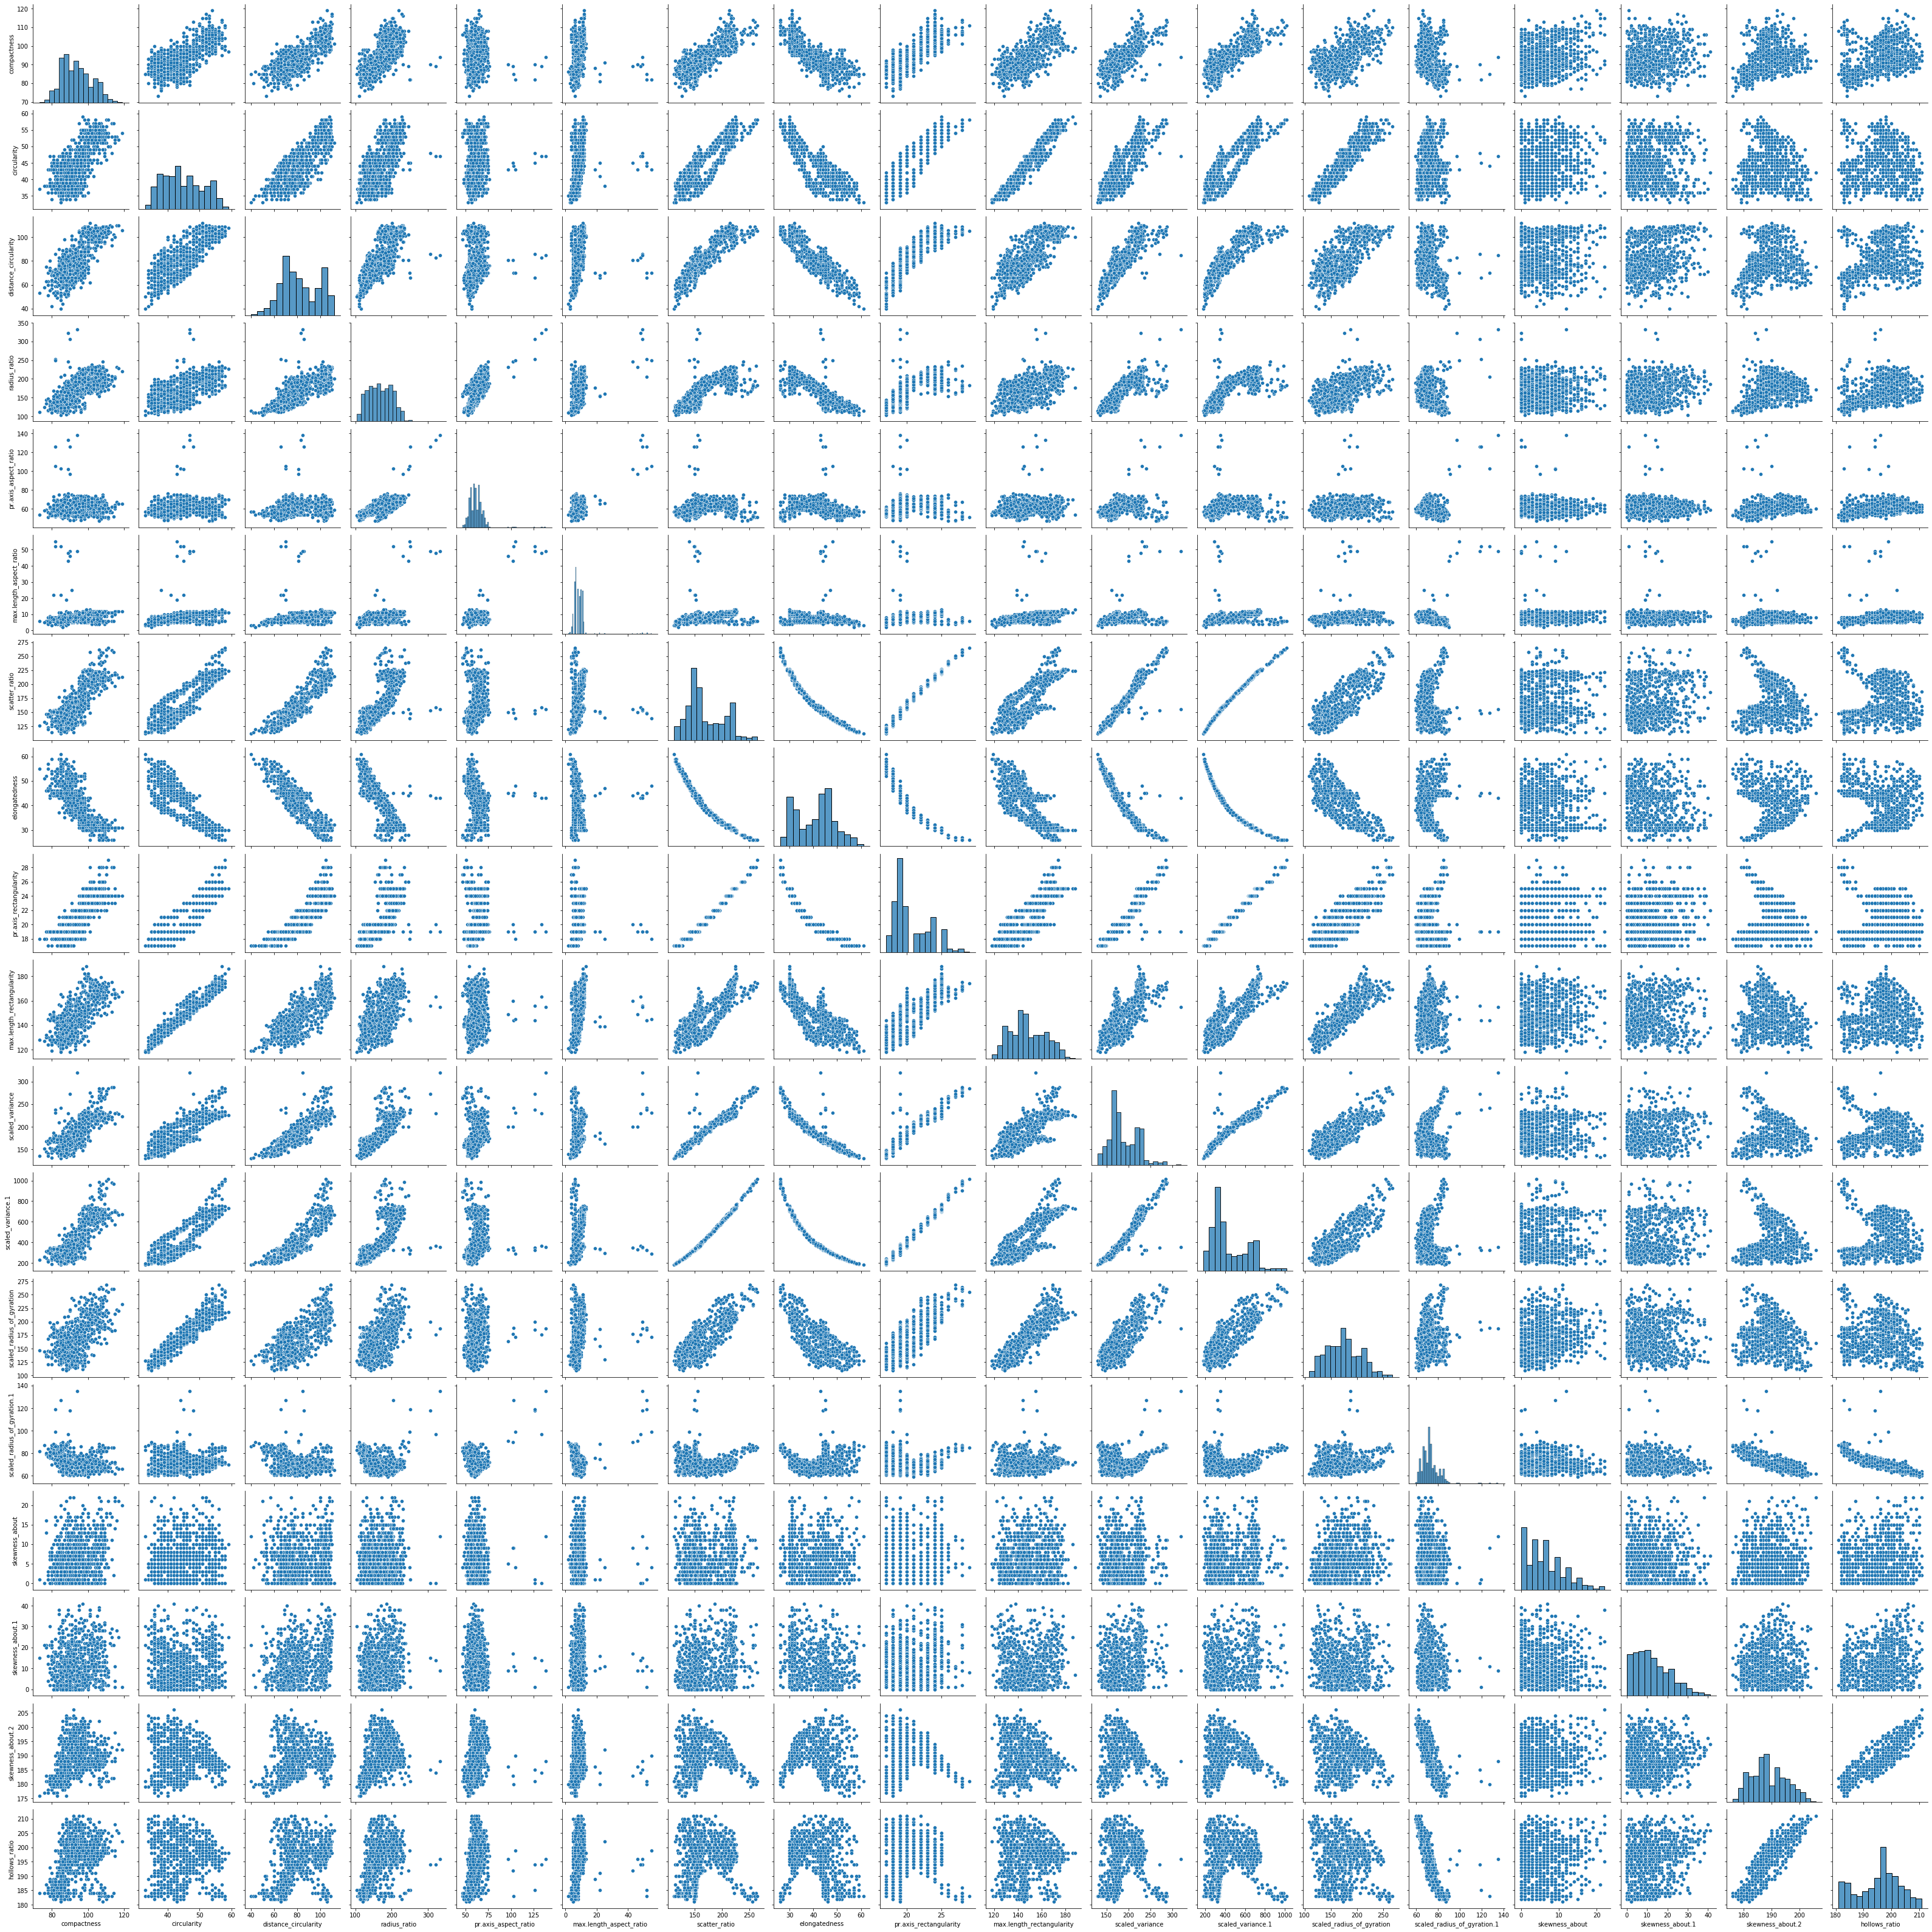

In [258]:
sns.pairplot(data)

In [259]:
data.corr().style.background_gradient(cmap='BuGn')

- The highest positive correlation is between the 'circularity' feature and 'length_rectangularity' feature.
- The highest negative correlation is between the 'elongatedness' feature and 'scatter_ratio' feature.

In [260]:
# Impute the null values using the most frequently occuring values in the respective column
columns = data.columns
imputer = SimpleImputer(missing_values = np.nan, strategy ='most_frequent',copy=False)
data_imp = pd.DataFrame(imputer.fit_transform(data))
data = data_imp
data.columns = columns
data[columns[:-1]] = data[columns[:-1]].apply(pd.to_numeric)
data.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107         43.0                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0         197.0   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                  64.0                       10          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        1

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  3. SVM classifier - given data

In [261]:
X = data.drop(['class'], axis=1)
y = data['class']

X_scaled = X.apply(zscore)
X_scaled

compactness  circularity  distance_circularity  radius_ratio  \
0       0.160580     0.518929              0.061236      0.266328   
1      -0.325470    -0.622638              0.124646     -0.839322   
2       1.254193     0.845092              1.519668      1.192683   
3      -0.082445    -0.622638             -0.002174     -0.301438   
4      -1.054545    -0.133395             -0.763094      1.073153   
..           ...          ...                   ...           ...   
841    -0.082445    -0.948800              0.314877      0.415740   
842    -0.568495     0.192767              0.124646     -0.181908   
843     1.497218     1.497416              1.202618      1.581155   
844    -0.933032    -1.438044             -0.255814     -0.689910   
845    -1.054545    -1.438044             -1.016735     -1.377205   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                1.309375                 0.311542      -0.207325   
1               -0.594598                 0.094079      -0.599104   
2                0.547786                 0.311542       1.148835   
3                0.166991                 0.094079      -0.749789   
4                5.244251                 9.444962      -0.599104   
..                    ...                      ...            ...   
841              0.293923                -0.123383       0.003634   
842              0.547786                 0.529004      -0.297735   
843              0.674717                 0.746467       1.600889   
844             -0.467666                -0.340845      -1.021021   
845             -0.848461                -0.775770      -1.473074   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0         0.137952               -0.222844                   0.758332   
1         0.521859               -0.609167                  -0.344578   
2        -1.141737                0.936126                   0.689401   
3         0.649828               -0.609167                  -0.344578   
4         0.521859               -0.609167                  -0.275646   
..             ...                     ...                        ...   
841      -0.117986               -0.222844                  -0.964965   
842       0.265921               -0.222844                   0.758332   
843      -1.397674                1.708773                   1.723379   
844       1.161703               -0.995490                  -1.654284   
845       1.929517               -1.381814                  -1.378557   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0          -0.400718          -0.341356                   0.284757   
1          -0.592068          -0.619074                  -0.514466   
2           1.098187           1.109579                   1.391373   
3          -0.910984          -0.738096                  -1.467386   
4           1.672236          -0.647412                   0.407714   
..               ...                ...                        ...   
841         0.364680          -0.097644                  -0.791120   
842        -0.496393          -0.403701                   0.038842   
843         1.257645           1.597002                   0.776586   
844        -1.070442          -0.959137                  -0.821859   
845        -1.548816          -1.287864                  -1.344428   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                      -0.327652       -0.066297          0.380870   
1                      -0.059703        0.543350          0.156798   
2                       0.074272        1.559428         -0.403383   
3                      -1.265475       -0.066297         -0.291347   
4                       7.308903        0.543350         -0.179311   
..                           ...             ...               ...   
841                    -0.059703        0.136918          1.389197   
842                    -0.059703       -1.082375          0.829015   

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

In [263]:
svm_clf = svm.SVC()
svm_clf.fit(X_train , y_train)
svm_clf.score(X_test , y_test)

0.952755905511811

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  3. Dimensionality reduction

In [264]:
pca = PCA(n_components=X.shape[1])
pca.fit(X_train)

PCA(n_components=18)

In [265]:
pca.explained_variance_ratio_

array([5.41932232e-01, 1.77221324e-01, 7.41329391e-02, 6.71940103e-02,
       4.83030502e-02, 3.10261251e-02, 2.03960454e-02, 1.24020523e-02,
       8.94662641e-03, 5.04474762e-03, 3.52930652e-03, 2.73959759e-03,
       2.19198009e-03, 1.61964702e-03, 1.24311545e-03, 1.10270465e-03,
       7.47730452e-04, 2.26765428e-04])

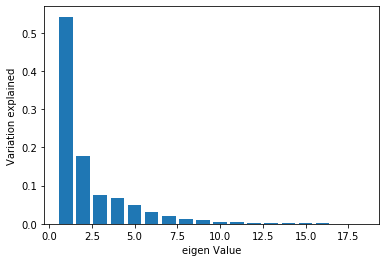

In [266]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

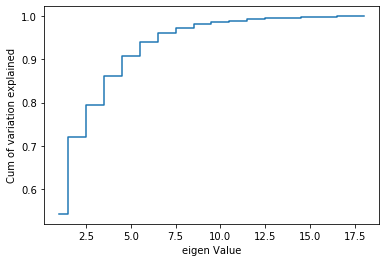

In [267]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [268]:
pca8 = PCA(n_components=8)
pca8.fit(X_train)
Xpca8_train = pca8.transform(X_train)
Xpca8_test = pca8.transform(X_test)

In [269]:
print(Xpca8_train)
print(Xpca8_test)

[[ 2.06293953 -1.49010755 -0.42483633 ... -0.16510788 -0.57483347
  -0.11175765]
 [ 2.95247216  0.63972553  0.64116034 ...  0.83469476 -0.22551309
  -0.99912747]
 [-4.99862709  2.35852298 -0.26483098 ...  0.46429924  0.23079191
  -0.60867363]
 ...
 [ 0.09583801 -1.53603265 -0.4412031  ...  0.52774376  0.06002674
  -0.70989873]
 [-0.57682882  1.66467106 -0.03260414 ... -2.02372312  0.1020437
   0.35528024]
 [ 2.86178458  1.86763088 12.7691442  ... -0.06744965  1.52019271
   0.81089111]]
[[-0.93542305  1.57584352 -0.16910566 ... -1.6884099   0.40750893
   0.34017479]
 [ 4.44442093  2.04614146 -1.19376396 ...  1.31878673  0.32140165
   1.15827398]
 [ 0.43000558 -1.56720617  0.24737022 ...  1.98003632 -0.28850948
   0.74081485]
 ...
 [-4.07061277  1.06819308 -0.39676864 ...  0.5475336   0.06243792
  -0.33303078]
 [-1.53122    -2.68859598  0.79341584 ...  1.67706867 -0.02521158
   0.56086666]
 [-1.96728992 -3.32701236  0.20859812 ...  0.7285139   0.5492644
   0.70725264]]


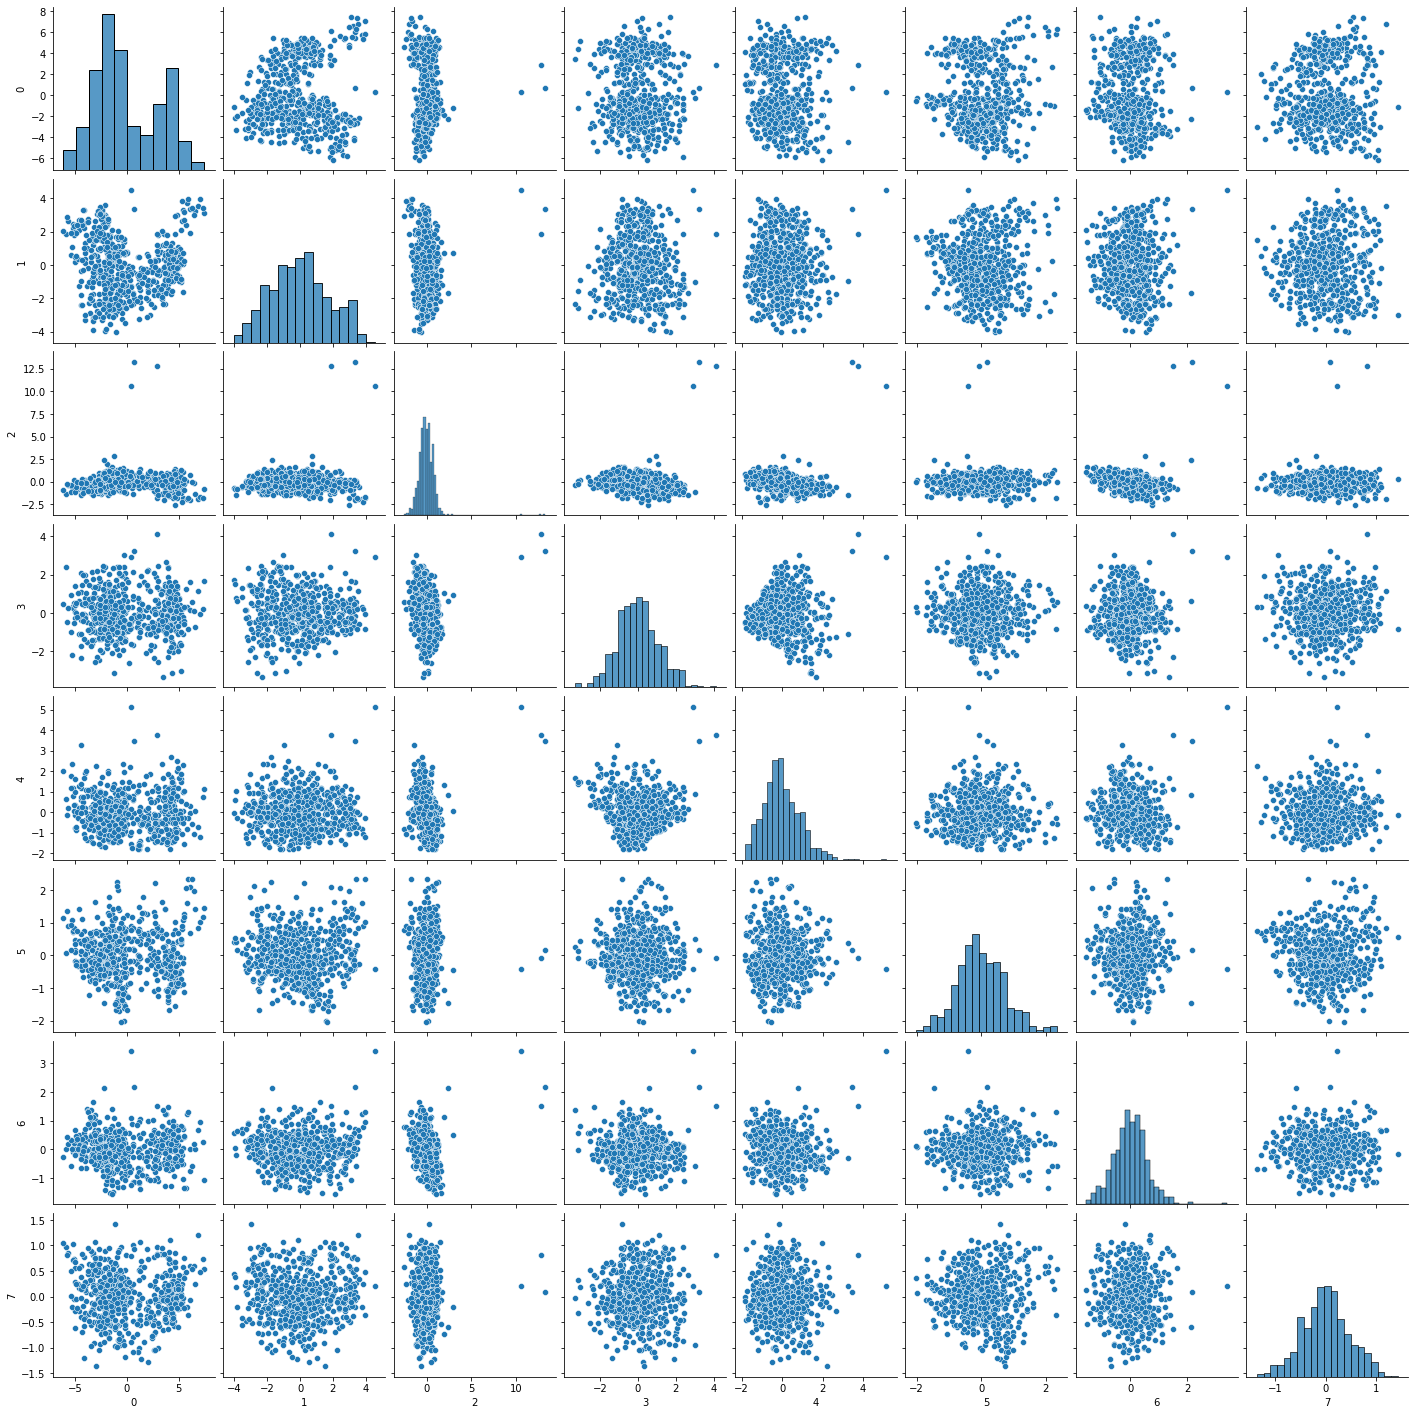

In [270]:
sns.pairplot(pd.DataFrame(Xpca8_train))

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  4. SVM classifier - reduced data

In [271]:
svm_clf = svm.SVC()
svm_clf.fit(Xpca8_train , y_train)
svm_clf.score(Xpca8_test , y_test)

0.9409448818897638

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  6. Conclusion

By using the dimensionality reducing technique, we are able to accurately predict the data with 94% with only 8 principal components while the achieved accuracy is 95% using all the features.

<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;">  Part-4

In [272]:
data = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv', skiprows=range(1,180,2))

In [273]:
data.head(20)

Name  Runs    Ave      SR  Fours  Sixes  HF
0         CH Gayle   733  61.08  160.74     46     59   9
1        G Gambhir   590  36.87  143.55     64     17   6
2         V Sehwag   495  33.00  161.23     57     19   5
3         CL White   479  43.54  149.68     41     20   5
4         S Dhawan   569  40.64  129.61     58     18   5
5        AM Rahane   560  40.00  129.33     73     10   5
6     KP Pietersen   305  61.00  147.34     22     20   3
7        RG Sharma   433  30.92  126.60     39     18   5
8   AB de Villiers   319  39.87  161.11     26     15   3
9        JP Duminy   244  81.33  128.42     13     11   2
10       DA Warner   256  36.57  164.10     28     14   3
11       SR Watson   255  42.50  151.78     26     14   2
12    F du Plessis   398  33.16  130.92     29     17   3
13         OA Shah   340  37.77  132.81     24     16   3
14        DJ Bravo   371  46.37  140.53     20     20   0
15       DJ Hussey   396  33.00  129.83     28     17   2
16        SK Raina   441  25.94  135.69     36     19   1
17       AT Rayudu   333  37.00  132.14     21     14   2
18   Mandeep Singh   432  27.00  126.31     53      7   2
19        R Dravid   462  28.87  112.13     63      4   2

In [274]:
print(data.shape)
print(data.size)

(90, 7)
630


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  1. EDA and visualisation

In [275]:
data.dtypes

Name      object
Runs       int64
Ave      float64
SR       float64
Fours      int64
Sixes      int64
HF         int64
dtype: object

In [276]:
data.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [277]:
data_attr = data.drop(['Name'], axis=1)

data_attr_scaled = data_attr.apply(zscore)
data_attr_scaled.head(20)

Runs       Ave        SR     Fours     Sixes        HF
0   3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
1   2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
2   1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
3   1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
4   2.246490  1.174755  0.444038  2.343021  1.309851  2.269533
5   2.188568  1.127500  0.432136  3.262788  0.304422  2.269533
6   0.547464  2.678077  1.197712  0.135580  1.561209  1.078525
7   1.371234  0.457059  0.316088  1.177983  1.309851  2.269533
8   0.637564  1.117901  1.783053  0.380852  0.932815  1.078525
9   0.154886  4.179184  0.393453 -0.416280  0.430100  0.483020
10  0.232114  0.874239  1.910153  0.503487  0.807137  1.078525
11  0.225679  1.312092  1.386450  0.380852  0.807137  0.483020
12  1.145984  0.622454  0.499724  0.564805  1.184173  1.078525
13  0.772713  0.962843  0.580065  0.258216  1.058494  1.078525
14  0.972220  1.597841  0.908230  0.012945  1.561209 -0.707989
15  1.133113  0.610640  0.453390  0.503487  1.184173  0.483020
16  1.422720  0.089351  0.702489  0.994030  1.435530 -0.112484
17  0.727664  0.905988  0.551584  0.074263  0.807137  0.483020
18  1.364798  0.167618  0.303760  2.036432 -0.072614  0.483020
19  1.557869  0.305693 -0.299009  2.649610 -0.449651  0.483020

Text(0.5, 1.0, 'Ave')

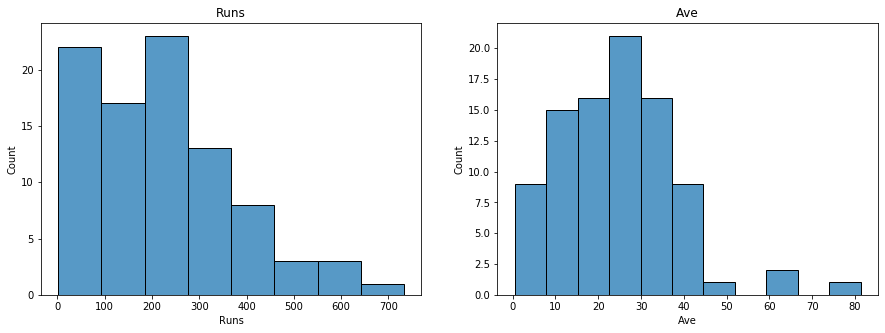

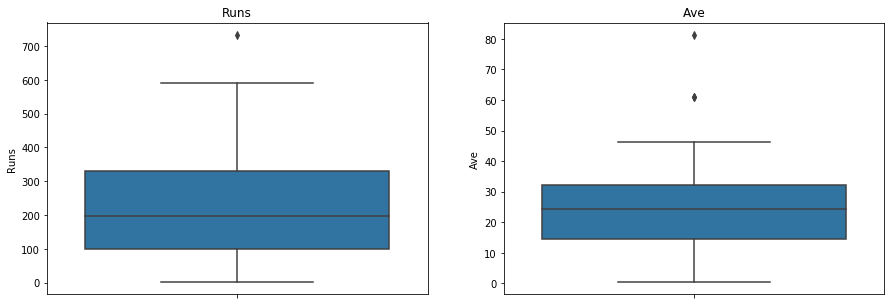

In [278]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['Runs'], ax = ax[0])
sns.histplot(data['Ave'], ax = ax[1])

ax[0].set_title('Runs')
ax[1].set_title('Ave')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "Runs",data=data, ax = ax[0])
sns.boxplot(y = "Ave",data=data, ax = ax[1])

ax[0].set_title('Runs')
ax[1].set_title('Ave')

Text(0.5, 1.0, 'Fours')

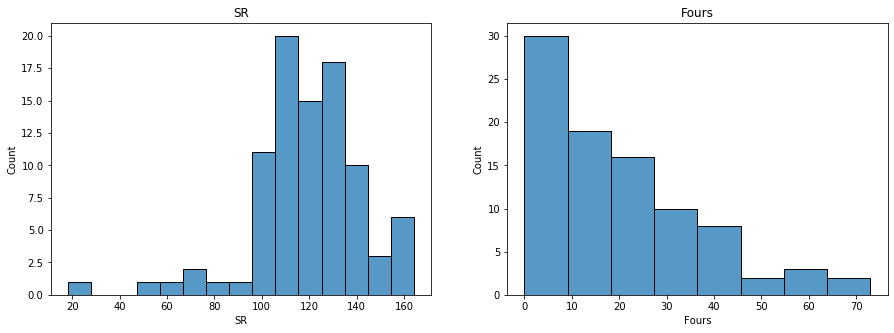

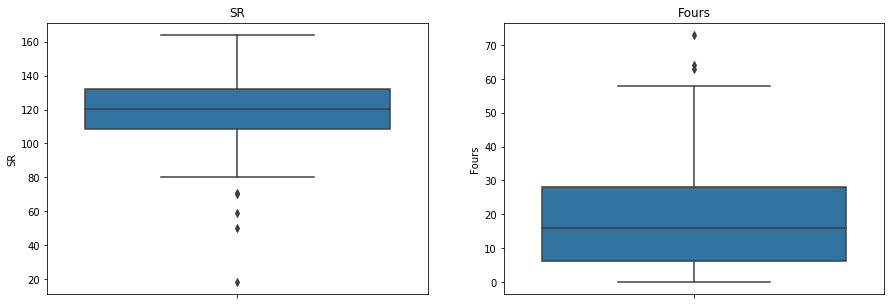

In [279]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['SR'], ax = ax[0])
sns.histplot(data['Fours'], ax = ax[1])

ax[0].set_title('SR')
ax[1].set_title('Fours')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "SR",data=data, ax = ax[0])
sns.boxplot(y = "Fours",data=data, ax = ax[1])

ax[0].set_title('SR')
ax[1].set_title('Fours')

Text(0.5, 1.0, 'HF')

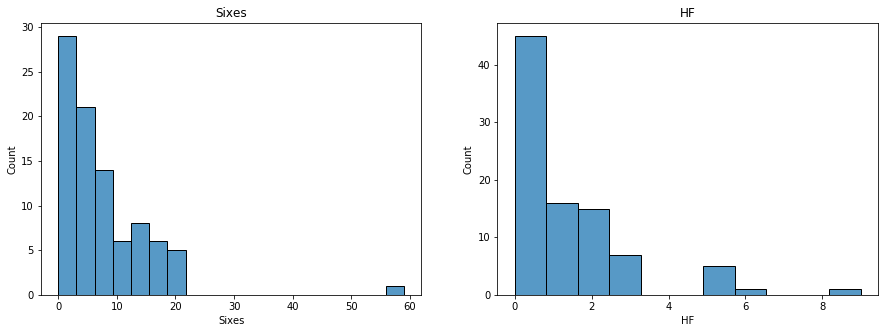

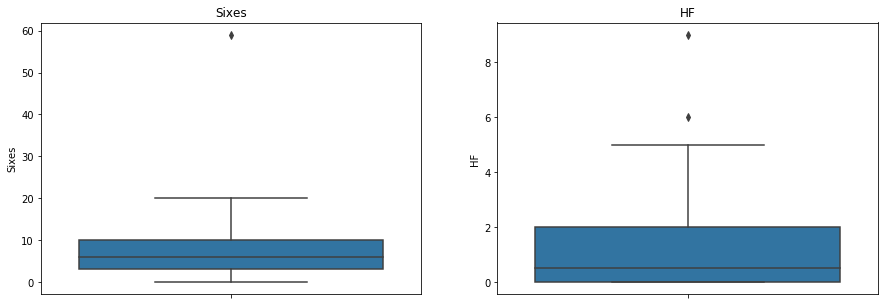

In [280]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['Sixes'], ax = ax[0])
sns.histplot(data['HF'], ax = ax[1])

ax[0].set_title('Sixes')
ax[1].set_title('HF')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "Sixes",data=data, ax = ax[0])
sns.boxplot(y = "HF",data=data, ax = ax[1])

ax[0].set_title('Sixes')
ax[1].set_title('HF')

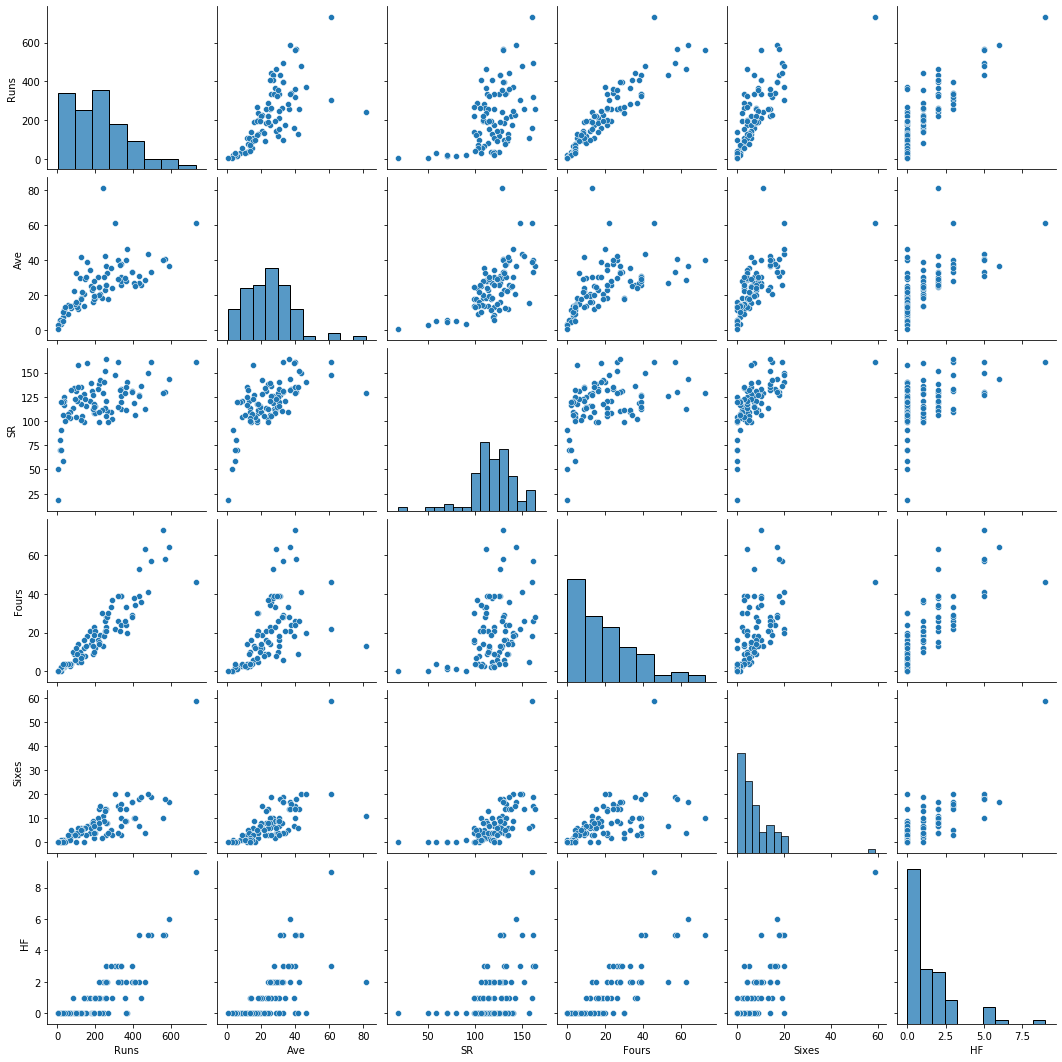

In [281]:
sns.pairplot(data)

In [282]:
data.corr().style.background_gradient(cmap='BuGn')

- It can be observed that the total runs scored is highly correlated with the number of fours and the number of half centuries.
- The lowest correlation is between the strike rate and the number of fours.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  2. Data driven model to rank all the players

In [283]:
pca = PCA(n_components=data_attr_scaled.shape[1])
pca.fit(data_attr_scaled)
pca.explained_variance_ratio_

array([0.70911996, 0.13784566, 0.06867133, 0.05424458, 0.02730624,
       0.00281223])

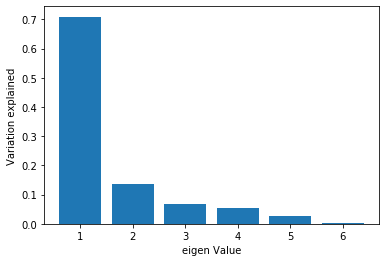

In [284]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [285]:
P = pca.components_
P

array([[ 0.4582608 ,  0.39797313,  0.3253838 ,  0.40574167,  0.41733459,
         0.43237178],
       [ 0.26643209, -0.33111756, -0.69780334,  0.47355804, -0.17902455,
         0.27593225],
       [-0.10977942,  0.00550486, -0.45013448, -0.50823538,  0.66942589,
         0.28082541],
       [-0.00520142,  0.84736307, -0.43275029, -0.03252305, -0.24878157,
        -0.17811777],
       [ 0.45840889, -0.10122837, -0.11890348,  0.09676885,  0.39458014,
        -0.77486668],
       [ 0.70483594, -0.0606373 ,  0.05624934, -0.58514214, -0.35786211,
         0.16096217]])

In [286]:
eig_vals = pca.explained_variance_ratio_

In [287]:
loading_vecs = P*np.sqrt(eig_vals)
loading_vecs

array([[ 0.38589803,  0.14775776,  0.08526752,  0.09449913,  0.06896287,
         0.02292888],
       [ 0.22436049, -0.12293591, -0.18286087,  0.11029387, -0.02958309,
         0.01463282],
       [-0.09244444,  0.00204382, -0.11795871, -0.11837039,  0.11061994,
         0.0148923 ],
       [-0.00438007,  0.31460533, -0.11340314, -0.00757477, -0.04111016,
        -0.00944567],
       [ 0.38602274, -0.03758364, -0.03115891,  0.02253792,  0.06520279,
        -0.04109154],
       [ 0.59353713, -0.02251316,  0.01474026, -0.13628233, -0.05913528,
         0.0085359 ]])

In [288]:
# Considering 3 principal components
loadings_sum=np.zeros(shape=(1,6))
for i in range(0,3):
    loadings_sum = np.array(loading_vecs[i])+loadings_sum
    
loadings_sum = loadings_sum.reshape((6))
loadings_sum

array([ 0.51781408,  0.02686567, -0.21555205,  0.08642261,  0.14999972,
        0.052454  ])

In [289]:
scores = np.matmul(data_attr_scaled.to_numpy(), np.array(loadings_sum))
#scores.sort()
scores

array([ 2.75324158,  1.59607978,  1.07919001,  1.08667198,  1.61712463,
        1.51710265,  0.39973452,  1.07151785,  0.20524099,  0.16154438,
       -0.04690251,  0.03257855,  0.7854233 ,  0.53861756,  0.54874838,
        0.75189252,  0.88301717,  0.43506384,  0.8361767 ,  1.0662264 ,
       -0.58319672,  0.50062824,  0.45999835,  0.40781373,  0.79876719,
        0.50690683, -0.05521139,  0.52373222,  0.67759549, -0.07466924,
        0.45877785,  0.30787736,  0.89396539,  0.43584003, -0.12000794,
        0.15769941, -0.11550104,  0.2653966 , -0.55232676, -0.21761805,
        0.38405313, -0.43113417, -0.27354017, -0.41978654, -0.06757703,
       -0.67360098,  0.17372035, -0.89023507, -0.10814832, -0.53250433,
       -0.40464542, -0.227343  ,  0.12659168, -0.05037847, -0.33294286,
       -0.75690497, -0.12203999,  0.02739272,  0.02494177, -0.19466501,
        0.28184842, -0.15681925, -0.69748313, -0.5530153 , -0.79032429,
       -0.31467594, -0.49130336, -0.57599458, -0.68003291, -0.27

In [290]:
data['Score'] = scores
data

Name  Runs    Ave      SR  Fours  Sixes  HF     Score
0      CH Gayle   733  61.08  160.74     46     59   9  2.753242
1     G Gambhir   590  36.87  143.55     64     17   6  1.596080
2      V Sehwag   495  33.00  161.23     57     19   5  1.079190
3      CL White   479  43.54  149.68     41     20   5  1.086672
4      S Dhawan   569  40.64  129.61     58     18   5  1.617125
..          ...   ...    ...     ...    ...    ...  ..       ...
85       Z Khan    12   6.00   70.58      1      0   0 -0.564484
86   WD Parnell    19   4.75   70.37      2      0   0 -0.536413
87  PC Valthaty    30   5.00   58.82      4      0   0 -0.382831
88     RP Singh     6   3.00   50.00      0      0   0 -0.407160
89     R Sharma     2   0.50   18.18      0      0   0 -0.133889

[90 rows x 8 columns]

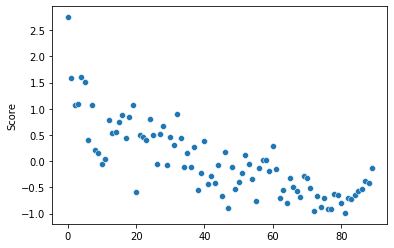

In [291]:
sns.scatterplot(data=data,x=data.index,y='Score')

In [292]:
data.sort_values(['Score'],ascending=False)

Name  Runs    Ave      SR  Fours  Sixes  HF     Score
0         CH Gayle   733  61.08  160.74     46     59   9  2.753242
4         S Dhawan   569  40.64  129.61     58     18   5  1.617125
1        G Gambhir   590  36.87  143.55     64     17   6  1.596080
5        AM Rahane   560  40.00  129.33     73     10   5  1.517103
3         CL White   479  43.54  149.68     41     20   5  1.086672
..             ...   ...    ...     ...    ...    ...  ..       ...
47       JA Morkel   107  15.28  157.35      5      6   0 -0.890235
76  A Ashish Reddy    35   8.75  120.68      3      1   0 -0.911987
77      DL Vettori    31   7.75  119.23      3      1   0 -0.914014
72        R Bhatia    35  11.66  125.00      4      0   0 -0.959350
81        R Ashwin    18   6.00  120.00      2      0   0 -0.992015

[90 rows x 8 columns]

In [293]:
# Considering 6 principal components
loadings_sum=np.zeros(shape=(1,6))
for i in range(0,6):
    loadings_sum = np.array(loading_vecs[i])+loadings_sum
    
loadings_sum = loadings_sum.reshape((6))
loadings_sum

array([ 1.49299388,  0.28137421, -0.34537385, -0.03489657,  0.11495707,
        0.01045268])

In [294]:
scores = np.matmul(data_attr_scaled.to_numpy(), np.array(loadings_sum))
#scores.sort()
scores

array([ 5.81006542,  3.52145178,  2.3063289 ,  2.58982385,  3.62371786,
        3.38037793,  1.34325766,  2.19987191,  0.75582397,  1.34028855,
        0.01930607,  0.31182679,  1.84119119,  1.34818036,  1.75905128,
        1.83056789,  2.03579153,  1.24605958,  1.90552473,  2.3760695 ,
       -0.91118081,  1.03921214,  1.52223104,  0.94363661,  1.8425097 ,
        1.17925435, -0.17912053,  1.17487046,  1.55984359, -0.27362229,
        1.07900488,  0.67796937,  2.02930125,  1.29163738, -0.11136534,
        0.34561763,  0.07430159,  0.45761943, -0.79040235, -0.33135483,
        0.79621042, -0.73261997, -0.52345862, -0.96093475, -0.09086314,
       -1.20519783,  0.53927878, -1.8406143 , -0.25951279, -0.97453829,
       -0.69080326, -0.5411249 ,  0.28206781, -0.22929243, -0.5194879 ,
       -1.56774857, -0.17404429,  0.03931328,  0.0640035 , -0.43068489,
        0.53582903, -0.29049667, -1.63362463, -1.49372672, -1.83966613,
       -0.70956675, -1.03419313, -1.38811237, -1.5375827 , -0.80

In [295]:
data['Score'] = scores
data

Name  Runs    Ave      SR  Fours  Sixes  HF     Score
0      CH Gayle   733  61.08  160.74     46     59   9  5.810065
1     G Gambhir   590  36.87  143.55     64     17   6  3.521452
2      V Sehwag   495  33.00  161.23     57     19   5  2.306329
3      CL White   479  43.54  149.68     41     20   5  2.589824
4      S Dhawan   569  40.64  129.61     58     18   5  3.623718
..          ...   ...    ...     ...    ...    ...  ..       ...
85       Z Khan    12   6.00   70.58      1      0   0 -1.750449
86   WD Parnell    19   4.75   70.37      2      0   0 -1.708216
87  PC Valthaty    30   5.00   58.82      4      0   0 -1.432040
88     RP Singh     6   3.00   50.00      0      0   0 -1.566147
89     R Sharma     2   0.50   18.18      0      0   0 -1.189361

[90 rows x 8 columns]

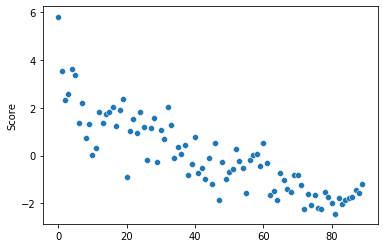

In [296]:
sns.scatterplot(data=data,x=data.index,y='Score')

In [297]:
data.sort_values(['Score'],ascending=False)

Name  Runs    Ave      SR  Fours  Sixes  HF     Score
0         CH Gayle   733  61.08  160.74     46     59   9  5.810065
4         S Dhawan   569  40.64  129.61     58     18   5  3.623718
1        G Gambhir   590  36.87  143.55     64     17   6  3.521452
5        AM Rahane   560  40.00  129.33     73     10   5  3.380378
3         CL White   479  43.54  149.68     41     20   5  2.589824
..             ...   ...    ...     ...    ...    ...  ..       ...
74         P Kumar    35  11.66  116.66      2      1   0 -2.076069
76  A Ashish Reddy    35   8.75  120.68      3      1   0 -2.197686
72        R Bhatia    35  11.66  125.00      4      0   0 -2.217239
77      DL Vettori    31   7.75  119.23      3      1   0 -2.235608
81        R Ashwin    18   6.00  120.00      2      0   0 -2.420488

[90 rows x 8 columns]

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  3. Conclusions

- The players with highest runs are ranked at the top.
- It can be observed that the distribution of the scores is not changed for using 3 and 6 principal components.

<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;">  Part-5

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  1. List of dimensionality reduction techniques that can be implemented using python

1. Missing Value Ratio
2. Low Variance Filter
3. High Correlation Filter
4. Random Forest
5. Backward Feature Elimination
6. Forward Feature Selection
7. Principal Component Analysis
8. Independent Component Analysis

In [ ]:
# Load disgits from sklearn.datasets
digits = load_digits(as_frame=True)
plt.matshow(digits.images[0])

In [ ]:
digits.feature_names

In [ ]:
digits.target_names

In [ ]:
digits_df = digits.frame
digits_df

In [ ]:
digits_df.shape

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  2. SVM classifier - given data:

In [ ]:
X = digits_df.drop(['target'], axis=1)
y = digits_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(X_train , y_train)
svm_clf.score(X_test , y_test)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  3. Dimensionality reduction:

In [ ]:
pca = PCA(n_components=X.shape[1])
pca.fit(X_train)

In [ ]:
plt.bar(list(range(1,65)),pca.explained_variance_ratio_, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
plt.step(list(range(1,65)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
pca10 = PCA(n_components=10)
pca10.fit(X_train)
Xpca10_train = pca10.transform(X_train)
Xpca10_test = pca10.transform(X_test)

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(Xpca10_train , y_train)
svm_clf.score(Xpca10_test , y_test)

In [ ]:
pca20 = PCA(n_components=20)
pca20.fit(X_train)
Xpca20_train = pca20.transform(X_train)
Xpca20_test = pca20.transform(X_test)

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(Xpca20_train , y_train)
svm_clf.score(Xpca20_test , y_test)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  4. Conclusion:

- We obtain 98.5% accuracy score using SVM on the raw data of the digits.
- However, by using the dimensionality reducing technique, we are able to accurately predict the digits with 97.5% with only 10 principal components and with 98.7% by using 20 principal components.